<a href="https://colab.research.google.com/github/AnaGutson/AlgebraII/blob/main/Guia_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 1**

In [2]:
from sympy import *
from sympy import I as i
init_printing(use_unicode=True)
from typing import List, Dict

## **General**

### **Producto Vectorial**

In [3]:
def vectorial_product(A,B):
  a = Matrix([[A[1], A[2]], [B[1], B[2]]]).det()
  b = Matrix([[A[0], A[2]], [B[0], B[2]]]).det()
  c = Matrix([[A[0], A[1]], [B[0], B[1]]]).det()
  return Matrix([a, -b, c])

## **Específico**

### **Matrices**

In [4]:
'''
  A.inv                                   -> La inversa de A
  A.T                                     -> La transpuesta de A
  A.transpose()                           -> La transpuesta de A
  A.det                                   -> Determinante de A
  A.normalized()                          -> Matriz normalizada
  A.rref()                                -> Matriz triangulada
  A[1,0]                                  -> Posicion segunda fila primera columna
  A[:,0]                                  -> La primera columna de A
  A[0,:]                                  -> La primera fila de A
  A.col(0)                                -> La primera columna de A
  A.subs(t, pi/3)                         -> Reemplaza las t por pi/3
  A.subs({x1:1, x2:5, x3:7})               -> Reemplaza x1 por 1, x2 por 5...
  Z = zeros(2,1)                          -> Matriz de 0s de 2 filas 1 columna
  eye(n)                                  -> Matriz identidad en n x n
  Matrix.hstack(v1,v2)                    -> Matriz con columnas v1, v2
  Matrix.vstack(v1,v2)                    -> Matriz con filas v1, v2
  Lambda = diag(2, 2, 3)                  -> Matriz diagonal
  x, parametro = B.gauss_jordan_solve(v)  -> Solucion de B.x = v
  simplify(A)                             -> Simplifica A
  expand(A)                               -> Expande A
  n, m = A.shape                          -> Cantidad filas y columnas de A
'''

#Escritura de matriz, ejemplos:

U = Rational('1/3') * Matrix([[ 2, 2, 1],
                              [-2, 1, 2],
                              [ 1,-2, 2]])

#___________________________________________

t = Symbol('t')
A = Matrix([[ cos(t), -sin(t)],
            [ sin(t), cos(t)]])
A = A.subs(t, pi/3)

def rango(A):
  return len(A.columnspace())

### **Polinomios**

In [5]:
'''
  diff(p,x) -> La derivada de p respecto de x
  p.subs(x,1) -> p(1)
  p.factor() -> factoriza un polinomio
  p.roots() -> las raices del polinomio
  P = plot(p,(x,0,2)) -> grafico del polinomio con x entre 0 y 2
  P = plot(*L, (x,0,2)) -> grafico de una lista de polinomios con x entre 0 y 2
  P[0].line_color = 'red' -> color del primer polimonio
  P.show() -> muestra el grafico del polinomio con x entre 0 y 10
'''

#Escritura de polimomio, ejemplos:

x, a0, a1, a2 = symbols('x, a0, a1, a2')
p = a0 + a1*x + a2*x**2

### **Combinación Lineal**

Sea $\mathbb{S}={\rm gen}\left\{\underbrace{\begin{bmatrix}2&1&2\end{bmatrix}^T}_{v_1}, \underbrace{\begin{bmatrix}1&2&-2\end{bmatrix}^T}_{v_2}\right\}$.

Por definición, $v\in\mathbb{S}$ si y solamente si existen $a,b\in\mathbb{R}$ tales que $v=av_1+bv_2$.

Nótese que 
\begin{align}
v&=av_1+bv_2=a\begin{bmatrix}2\\1\\2\end{bmatrix}+b\begin{bmatrix}1\\2\\-2\end{bmatrix}=\begin{bmatrix}2a+b\\a+2b\\2a-2b\end{bmatrix}=\underbrace{\begin{bmatrix}2&1\\1&2\\2&-2\end{bmatrix}}_{B\in\mathbb{R}^{3\times 2}}\underbrace{\begin{bmatrix}a\\b\end{bmatrix}}_{x\in\mathbb{R}^2}.
\end{align}

El sistema $Bx=v$ tiene soluciones de la forma $x=\begin{bmatrix}0\\3\\0\end{bmatrix}+\tau_0\begin{bmatrix}1\\-2\\1\end{bmatrix}$, donde $\tau_0\in\mathbb{R}$. 


$Bx=v$ tiene solución si y solamente si $v ∈ col(B)$

*   $Bx=v$ tiene solución única $<=>$ las columnas de A forman un conjunto LI $<=>$ $Nul(A)$ = 0 
*   $Bx=v$ tiene $\infty$ soluciones $<=>$ las columnas de A forman un conjunto LD $<=>$ $Nul(A)$ $\neq$ 0 

In [6]:
#Definir los vectores 
v1 = Matrix([2,1,2])
v2 = Matrix([1,2,-2])

#Definir los parámetros simbólicos
a = Symbol('a')
b = Symbol('b')

#Realizar la combinación lineal
v = a*v1 + b*v2

#_____________________________

#Construcción de la matriz A 
A = Matrix.hstack(v1, v2) #Los vectores v1 y v2 son las columnas de A

#Construcción del vector x
x = Matrix([a, b])

#Multiplicación de A por x  
v = A*x

#_____________________________
    
B = Matrix([[1,2,3],[4,5,6],[7,8,9]])
v = Matrix([6,15,24])
x_sol, parametro = B.gauss_jordan_solve(v) #Soluciones de B.x = v  

#_____________________________

#Tres soluciones distintas de la ecuación Bx=v 
tau0 = parametro[0]
for val in [0, 2, 4]:
  x_sol_eval = x_sol.subs({tau0: val})
  print('x = ({}).v_1 + ({}).v_2 + ({}).v_3'.format(x_sol_eval[0], x_sol_eval[1], x_sol_eval[2]))

#_____________________________

def gauss_jordan_con_generadores(A: Matrix, z: Matrix): #devuelve la solucion de gauss jordan entera, la sol part y sus generadores
  x, p = A.gauss_jordan_solve(z) 
  
  #hallo sol particular
  x_0 = x
  for i in range(len(p)):  
    x_0 = x_0.subs({p[i]:0}) 
  
  #hallo generadores
  generadores = []
  for i in range(len(p)):
    x_i = x - x_0
    for j in range(len(p)):
      if j != i:
        x_i = x_i.subs({p[j]:0})
    x_i = x_i.subs({p[i]:1})
    generadores.append(x_i)

  return x, x_0, generadores

x = (0).v_1 + (3).v_2 + (0).v_3
x = (2).v_1 + (-1).v_2 + (2).v_3
x = (4).v_1 + (-5).v_2 + (4).v_3


### **Independencia Lineal**

Para analizar la dependencia lineal de un conjunto de vectores $\mathbb  {\rm}\left\{v_1, v_2, v_3\right\}$, se arma una matriz A con los vectores como columnas.

Si $\det(A)\neq 0$, se deduce que $\{v_1, v_2, v_3\}$ es linealmente independiente.

Otra forma de verlo es haciendo una combinación lineal tal que al igualarlo a 0, la única posible solución sea la trivial:

$\mathcal{L}$ $\mathbb = {\rm}\left\{\underbrace{\begin{bmatrix}2&0&1&1\end{bmatrix}^T}_{v_1}, \underbrace{\begin{bmatrix}1&0&4&4\end{bmatrix}^T}_{v_2}, \underbrace{\begin{bmatrix}2&5&5&5\end{bmatrix}^T}_{v_3}\right\}$ es linealmente independiente porque la ecuación
$x_1v_1+x_2v_2+x_3v_3=0$ tiene única solución, la solucion trivial.

Cuando la cantidad de vectores de un conjunto es igual a la dimensión del espacio vectorial, y ese conjunto de vectores es linealmente independiente, entonces forma una base.

Como el conjunto $$\mathcal{B}=\left\{\underbrace{\begin{bmatrix}2\\2\\1\end{bmatrix}}_{v_1}, \underbrace{\begin{bmatrix}-2\\1\\2\end{bmatrix}}_{v_2}, \underbrace{\begin{bmatrix}1\\-2\\2\end{bmatrix}}_{v_3}\right\}$$ tiene 3 vectores linealmente independientes, es una base de $\mathbb{R}^3$. 



In [7]:
#Verificar que un conjunto es LI

#FORMA 1: Los coeficientes de la combinación lineal deben ser 0.
v_1=Matrix([2,0,1,1])
v_2=Matrix([1,0,4,4])
v_3=Matrix([2,5,5,5])

A=Matrix.hstack(v_1,v_2,v_3)
b=Matrix([0,0,0,0])

x = A.gauss_jordan_solve(b) #si la solucion es la trivial, el conjunto es li.
x #la solucion es la trivial, así que el conjunto es li


#FORMA 2: El determinante de la matriz debe ser distinto de 0
#         La matriz debe ser cuadrada
v_1=Matrix([2,2,1])
v_2=Matrix([-2,1,2])
v_3=Matrix([1,-2,2])

MB=Matrix.hstack(v_1,v_2,v_3)

MB.det()

#_______________________

def encontrar_vector_li_a_conjunto(A: List[Matrix]):  #Principio de sustitución de Steinez
  cant_filas, _ = A[0].shape
  A_ld = Matrix.hstack(*A, eye(cant_filas,cant_filas))
  A_li = obtener_vectores_li(A_ld)
  return A_li

#_______________________

def obtener_vectores_li(A: Matrix):
  E_A, pivotes_A = A.rref()
  A_li = []
  for pivote in pivotes_A:
      A_li.append(A.col(pivote))        #De la matriz original
  return A_li

#_______________________

'''
  Ejemplo:
  B = [Matrix([a, 1, 2]), Matrix([3, 2, 3]), Matrix([1, -a, 1])] #una lista
  encontrar_a(B, a)
'''
a = Symbol('a')
def encontrar_a(B: List[Matrix], a: Symbol): #Halla el o los valores que puede tener a para que los vectores sean linealmente independientes: formen una base

    return solve(det(Matrix.hstack(*B)), a)

#### **Polinomios**
Sean $p_1, p_2, p_3$ los polinomios definidos por 

$p_1=1+x-x^2$, $p_2=7+9x^2$, $p_3=3-x-x^2$

Para examinar la independencia lineal de $\{p_1, p_2, p_3\}$ analizamos el determinante de la matriz de coeficientes de los polinomios $p_1, p_2, p_3$ respecto de las potencias de $x$.

$A=\begin{bmatrix}1&7&3\\1&0&-1\\-1&9&-1\end{bmatrix}$.

Como $\det(A)=50$, se concluye que el conjunto $\{p_1, p_2, p_3\}$ es linealmente independiente.


In [8]:
#Construir una matriz a partir de vectores
p1 = Matrix([1,1,-1])
p2 = Matrix([7,0,9])
p3 = Matrix([3,-1,-1])

A = Matrix.hstack(p1,p2,p3) #los vectores quedan en columnas

determinante = A.det()

### **Wronskiano**

In [9]:
#(existe wronskian() directamente de sympy, pero no devuelve la matriz wronskiana, sino sólo el valor del wronskiano)

"""
    B (lista de funciones): conjunto de funciones sobre el cual calcular el Wronskiano en función de la variable x.
            
    Ejemplo:
    # Para ver si un conjunto es linealmente independiente en su correspondiente espacio vectorial, podemos emplear el Wronskiano.
    x = Symbol('x') # Definición de la variable simbólica
    F = [1, sinh(x), cosh(x)] #Conjunto de funciones

    W, M_W = Wronskiano(F, x) #W es el Wronskiano, M_W es la matriz wronskiana
    print('La matriz wronskiana es: '); display(M_W)
    print('y el Wronskiano resulta: '); display(W)

    #W.subs(x,0) #Si quisiera evaluar el Wronskiano en algún valor de x, por ejemplo en este caso x=0
"""

def Wronskiano(B, x): #Calcula el Wronskiano del conjunto de funciones contenidas en B en función de la variable x.

    n = len(B) # Cantidad de vectores

    # Calculo la matriz wronskiana
    W = zeros(n,n)
    for i in range(n):
        for j, f in enumerate(B):
            W[i,j] = diff(f,x,i)
            
    return W.det(), W #devuelve el wronskiano y su matriz W

### **Subespacios**

*   $rango(A)$ $:=$ cantidad de pivotes de $E_A$.
*   $rango(A)$ $:=$ cantidad de filas no nulas de $E_A$.
*   $rango(A)$ $:=$ cantidad de columnas basicas de $A$.

*   $rango(A)$ = $dim(col(A))$ = $dim(fil(A))$.

*   $dim(nul(A))$ = $n$ − $rango(A)$ = $n$ − $dim(col(A))$

  Siendo $n$ = cantidad de columnas de $A$ 

*   $dim(nul(A^T))$ = $m$ − $dim(col(A^T))$ = $m$ − $dim (fil(A))$.

  Siendo $m$ = cantidad de filas de $A$ 

*   yapa: $dim(\mathbb{S})$ = $dim(\mathbb{V})$ - número ecuaciones.


$Bx=v$ tiene solución si y solamente si $v ∈ col(B)$

*   $Bx=v$ tiene solución única $<=>$ las columnas de A forman un conjunto LI $<=>$ $Nul(A)$ = 0 
 
  Si tiene solución única, puedo hacer x = $B^{-1}.v$
*   $Bx=v$ tiene $\infty$ soluciones $<=>$ las columnas de A forman un conjunto LD $<=>$ $Nul(A)$ $\neq$ 0 



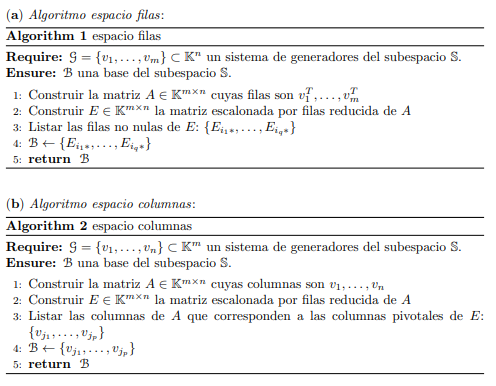

In [10]:
'''  
  A.nullspace() -> devuelve el espacio nulo de A 
  A.columnspace() -> devuelve el espacio columna de A
  A.T.columnspace() -> devuelve el espacio columna de A traspuesta
  A.T.nullspace() -> devuelve el espacio nulo de A traspuesta
  n, m = A.shape -> cantidad de filas y columnas de la matriz
'''

'''
    S: lista de los vectores que generan al subespacio S
    Los pivotes empiezan en 0 (por ej: la segunda columna figuraría con el pivote 1)
'''
def algoritmo_espacio_columna(S: List[Matrix]): #Encuentra el espacio columna de un subespacio
    B_S = Matrix.hstack(*S)
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append(S[pivote])        #De la matriz original
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio columna y los índices de los pivotes.    

def algoritmo_espacio_filas(S: List[Matrix]): #Encuentra el espacio fila de un subespacio
    B_S = Matrix.hstack(*S).T
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append((E_S[pivote,:]).T) #De la matriz escalonada
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio fila y los índices de los pivotes.     

'''
    Verifica si dos subespacios son el mismo subespacio devolviendo True para ese 
    caso y False en caso contrario.
    
    Ejemplo:
    S1 = [Matrix([-4, -5, -3]), Matrix([26, 41, 23])]
    bien = [Matrix([11, 18, 10]), Matrix([15, 23, 13])]
    mal_1 = [Matrix([-3, 10, 8]), Matrix([-6, 11, 10])]
    mal_2 = [Matrix([7, 12, 2]), Matrix([9, 14, 1])]
    mal_3 = [Matrix([7, 2, 12]), Matrix([9, 1, 14]), 2 * Matrix([9, 1, 14])]

    dos_subespacios_generan_el_mismo_subespacio(S1, bien), dos_subespacios_generan_el_mismo_subespacio(S1, mal_1), dos_subespacios_generan_el_mismo_subespacio(S1, mal_2), dos_subespacios_generan_el_mismo_subespacio(S1, mal_3)
'''
def dos_subespacios_generan_el_mismo_subespacio(S1: List[Matrix], S2: List[Matrix]):
    
    S1_li, pivotes_S1 = algoritmo_espacio_columna(S1)
    S2_li, pivotes_S2 = algoritmo_espacio_columna(S2)
    
    B_S1_li = Matrix.hstack(*S1_li)
    B_S2_li = Matrix.hstack(*S2_li)
    
    B = Matrix.hstack(B_S1_li, B_S2_li)
    _, pivotes_B = B.rref()
    
    return len(pivotes_B) == len(pivotes_S1) and len(pivotes_B) == len(pivotes_S2)
    

### **Polinomios interpoladores de Lagrange**

\begin{align}
p_i(x):=\prod_{\substack{k\in\mathbb{I}_n:\, k\neq i}}\left(\frac{x-x_k}{x_i-x_k}\right)
\end{align}

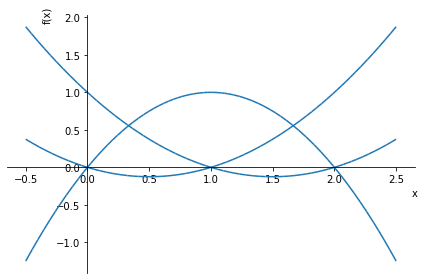

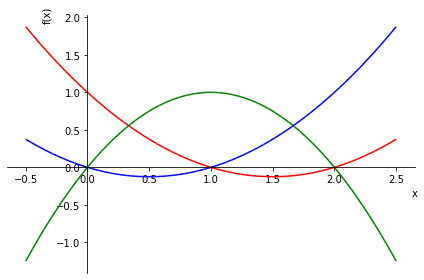

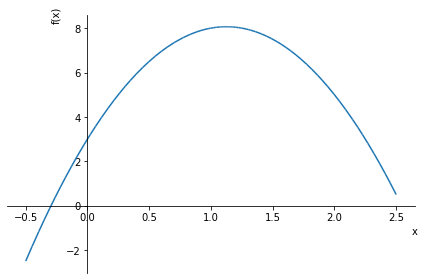

In [11]:
x = symbols('x') # defino la indeterminada x
X = Matrix([0, 1, 2]) # defino el conjunto abscisas y el orden en que se realizará el muestreo
n = len(X)
L = []
for i in range(n):
  p = 1
  for k in range(n):
    if k != i:
      p = p*(x - X[k])/(X[i] - X[k])
  L.append(p)
polimios = L

#Veo que el primer polinomio es 1 en 0, y 0 en el resto de valores...
p1 = L[0]
eval_0 = p1.subs({x:0})   # Lo evalúo en x=0
eval_1 = p1.subs({x:1})   # Lo evalúo en x=1
eval_2 = p1.subs({x:2})   # Lo evalúo en x=2

#Veo graficamente todos los polinomios
P = plot(*L, (x,-0.5,2.5))
P[0].line_color = 'red'
P[1].line_color = 'green'
P[2].line_color = 'blue'
P.show()


#Si quiero que en 0 valga 3, en 1 valga 8 y en 2 valga 5:
Y=Matrix([3,8,5])
p=0
for i in range(n):
  p=p+Y[i]*L[i]
expand(p)
plot(p, (x,-0.5,2.5))

#_____________________________

def pol_interpolador_lagrange(X = Matrix, x = Symbol):
  n = len(X)
  L = []
  for i in range(n):
    p = 1
    for k in range(n):
      if k != i:
        p = p*(x - X[k])/(X[i] - X[k])
    L.append(p)
  return L


### **Coordenadas**

Sea
$$\mathcal{B}=\left\{\underbrace{\begin{bmatrix}2\\2\\1\end{bmatrix}}_{v_1}, \underbrace{\begin{bmatrix}-2\\1\\2\end{bmatrix}}_{v_2}, \underbrace{\begin{bmatrix}1\\-2\\2\end{bmatrix}}_{v_3}\right\}$$
una base de $\mathbb{R}^3$.

El vector de coordenadas de $x=\begin{bmatrix}x_1&x_2&x_3\end{bmatrix}^T$ respecto de la base $\mathcal{B}$, es decir $[x]^{\mathcal{B}}$, se construye resolviendo el sistema lineal no homogéneo 

$$\begin{bmatrix}v_1&v_2&v_3\end{bmatrix}[x]^{\mathcal{B}}=x$$

$$\begin{bmatrix}2&-2&1\\2&1&-2\\1&2&2\end{bmatrix}\begin{bmatrix}a_1\\a_2\\a_3\end{bmatrix}=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}.$$

Por lo tanto,

$$[x]^{\mathcal{B}}=\frac{1}{9}\begin{bmatrix}2x_1+2x_2+x_3\\-2x_1+x_2+2x_3\\x_1-2x_2+2x_3\end{bmatrix}.$$

Sea
$$\mathcal{C}=\left\{
  \underbrace{\begin{bmatrix}1\\0\\0\end{bmatrix}}_{w_1},
  \underbrace{\begin{bmatrix}1\\1\\0\end{bmatrix}}_{w_2},
  \underbrace{\begin{bmatrix}1\\1\\1\end{bmatrix}}_{w_3}
  \right\}$$
otra base de $\mathbb{R}^3$.

Si quiero traducir un vector de una base a otra, utilizo la matriz de cambio de base $M_{\mathcal{B}}^{\mathcal{C}}$ $\in\mathbb{R}^{3\times 3}$ que satisface que $M_{\mathcal{B}}^{\mathcal{C}} [v]^{\mathcal{B}}=[v]^{\mathcal{C}}$

Además, $M_{\mathcal{B}}^{\mathcal{C}} = \begin{bmatrix}[v_1]^{\mathcal{C}}&[v_2]^{\mathcal{C}}&[v_3]^{\mathcal{C}}\end{bmatrix}.$

Entonces, por cada $v_i$ hago
$$\begin{bmatrix}w_1&w_2&w_3\end{bmatrix}[v_i]^{\mathcal{C}}=\begin{bmatrix}1&1&1\\0&1&1\\0&0&1\end{bmatrix}[v_i]^{\mathcal{C}}=v_i$$

es decir, 

$$M_{\mathcal{B}}^{\mathcal{C}} = (M_{\mathcal{C}})^{-1} M_{\mathcal{B}}$$

$$M_{\mathcal{B}}^{\mathcal{C}} = \begin{bmatrix}w_1&w_2&w_3\end{bmatrix}^{-1} \begin{bmatrix}v_1&v_2&v_3\end{bmatrix}$$



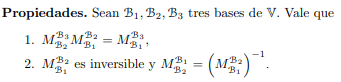

In [12]:
v_1 = Matrix([2,2,1])
v_2 = Matrix([-2,1,2])
v_3 = Matrix([1,-2,2])
MB = Matrix.hstack(v_1,v_2,v_3)

w1 = Matrix([1,0,0])
w2 = Matrix([1,1,0])
w3 = Matrix([1,1,1])
MC = Matrix.hstack(w1,w2,w3)

#Obtener coordenadas de un vector en base B
x1, x2, x3 = symbols('x1 x2 x3') 
x = Matrix([x1, x2, x3])

#FORMA 1: Triangulando
MBx = Matrix.hstack(MB,x)
MBx.rref()

#FORMA 2: Operando
#         La matriz tiene que ser cuadrada
xB = (MB.inv())*x

#Si quiero un vector específico:
reemplazo = xB.subs({x1:1,x2:5, x3:7})  #El vector de coordenadas de [1 2 3]^T respecto de la base B 

#_____________________________

#Matriz cambio de coordenadas
#Forma 1: A mano

v_1C = (MC.inv())*v_1
v_2C = (MC.inv())*v_2
v_3C = (MC.inv())*v_3
MBC = Matrix.hstack(v_1C, v_2C, v_3C)

#Forma 2: Directo
MBC = (MC.inv())*MB


'''
Devuelve las coordenadas de un vector respecto de una base B = {v1, v2, ..., vn}

v: Es un vector escrito con símbolos (v1, v2, etc)
coordenadas: es un diccionario que indica cómo traducir cada vector en coordenadas de la base B

Ejemplo de un ejercicio completo:

B = [v1, v2, v3]

coordenadas = {
    v1: Matrix([1, 0, 0]),
    v2: Matrix([0, 1, 0]),
    v3: Matrix([0, 0, 1]),
}

w1 = 0*v1 + 0*v2 + 0*v3
w2 = v1 - v2
w3 = 2*v2 - v3

w2_B = coordenadas_de_un_vector_respecto_a_una_base_B(w2, coordenadas)
w3_B = coordenadas_de_un_vector_respecto_a_una_base_B(w3, coordenadas)

G_B = Matrix([[60, 30, 20], [30, 20, 15], [20, 15, 12]])

G = matriz_de_gram(producto_interno_por_definicion, G_B, w2_B, w3_B)

area_de_un_triangulo(G)
'''

v1, v2, v3 = symbols('v1 v2 v3')

def coordenadas_de_un_vector_respecto_a_una_base_B(v: Matrix, coordenadas: Dict[Symbol, Matrix]):
    
    w = v
    for vector in coordenadas:
        w = w.subs(vector, coordenadas[vector])
    return w

#### **Polinomios**


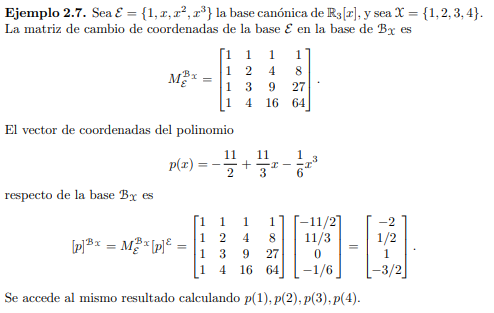

**Matrices de Vandermonde**

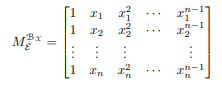

### **Ecuaciones Diferenciales**

Un operador diferencial lineal de orden $n$ con coeficientes constantes es una transformación lineal de la forma $$L = D^n + a_{n-1} D^{n-1} + ... + a_1 D + a_0 I$$ donde $D$ es el operador de derivación.

__________________

Una ecuación diferencial lineal de orden $n$ con coeficientes constantes es una ecuación de la forma $$L[y] = g$$ donde $L$ es un operador diferencial lineal de orden $n$ con coeficientes constantes y $g$ es una función suave.

__________________

El polinomio característico del operador $L$ es el polinomio $p \in \mathbb K_n[x]$ definido por $$p = x^n + a_{n-1}x^{n-1} + ... + a_1x + a_0.$$

__________________

El conjunto de todas las raíces del polinomio característico de $L$, $$\sigma (L) = \{ \lambda \in \mathbb C: p(\lambda) = 0 \},$$ se denomina el espectro de $L$.

Notar que:

$$gen\{e^{\lambda x}: \lambda \in \sigma (L) \cap \mathbb K \} \subseteq Nu(L)$$

$ \\ $

Cuando $\lambda$ es un valor imaginario, se utiliza la fórmula de Euler: $$e^{a + ib} = e^a(cos(b) + i sen(b)) = e^a cos(b) + e^a i\space sen(b) $$

Entonces, 

$ L[e^{a + ib}] = L[e^a cos(b) + e^a i\space sen(b)] = L[e^a cos(b)] + iL[e^a sen(b)] \space\textbf{=}\space 0 \quad\Leftrightarrow\quad  L[e^a cos(b)] = L[e^a sen(b)] = 0 $

Se deduce que:

$$gen\{e^a cos(b), e^a sen(b)\} \subseteq Nu(L)$$
______


**Análisis de los factores**

$$(D- \lambda I)^k [f(x)e^{\lambda x}] = f^{(k)} (x)e^{\lambda x}$$

Entonces:
$$\left\{p(x)e^{\lambda x}: p \in \mathbb C_{k-1}[x]\right\} ⊆ Nu\left((D-\lambda I)^k\right)$$

$ \\ $

*  Si $L = (D- \lambda _1 I)^{k_1} (D- \lambda _2 I)^{k_2}$
entonces:
$$Nu(L) = Nu\left((D- \lambda _1 I)^{k_1} \oplus (D-\lambda _2 I)^{k_2}\right)$$

* Si $L = (D^2 - 2aD + (a^2 - b^2) I)^k$ entonces:
$$Nu(L) = \bigoplus_{j=0}^{k-1} gen \{x^j e^{ax}cos(bx), x^j e^{ax}sen(bx) \}$$


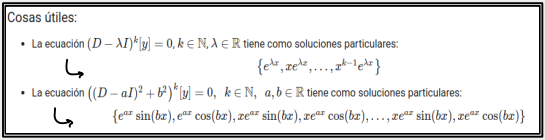

In [13]:
def nucleo_de_operador_diferencial(L):
    x = Symbol('x')
    Nu_L = set()
    raices = str(L).split('*')
    l = 1
    for raiz in raices:

      if '-' in raiz:
        index = raiz.index('-') + 1
        l = (int(raiz[index]))*(-1)
      elif '+' in raiz:
        index = raiz.index('+') + 1
        l = (int(raiz[index]))
      else:
        display(raiz)
      
      if '^' in raiz:
        k = int(raiz.split('^')[1])
      else:
        k = 1
          
      for i in range(k):
        Nu_L.add((x**(i))*exp(-l*x))

    return Nu_L

def gen_solucion_particular(L, AoL):
    Nu_L = nucleo_de_operador_diferencial(L)
    Nu_AoL = nucleo_de_operador_diferencial(AoL)
    Nu = set()
    Nu = Nu_L | Nu_AoL
    Nu = Nu - Nu_L
    return list(Nu)

D, I = symbols('D I')
L = '(D-5I)*(D+2I)^2'
AoL = '(D-5I)*(D+2I)^5'
gen_solucion_particular(L, AoL)

### **Infimo y Supremo**


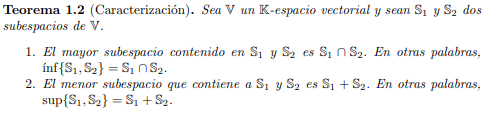

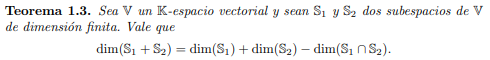

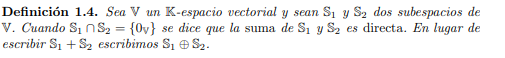

Por consiguiente, $dim(\mathbb{S}_1 \oplus \mathbb{S}_2)$ = $dim(\mathbb{S}_1)$ + $dim(\mathbb{S}_2)$.

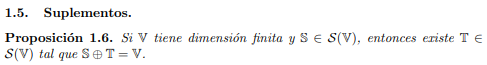

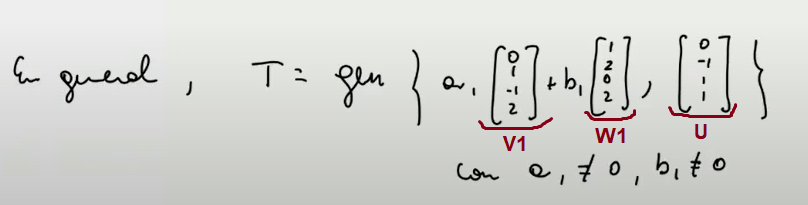

In [14]:
'''
cant_neg: cantidad de vectores que pertenecen al segundo subespacio
'''
def interseccion_S1_S2_dos_lados(S1: List[Matrix], S2: List[Matrix]):
  S2_neg = [i*(-1) for i in S2]
  B_S1_S2 = Matrix.hstack(*S1,*S2_neg)
  cant_S2 = len(S2)
  nul_B_S1_S2 = B_S1_S2.nullspace()
  S1_int_S2 = []
  for v in nul_B_S1_S2:
      v[(-1)*cant_S2:,:] = zeros(cant_S2, 1)
      S1_int_S2.append(B_S1_S2 * v)

  return S1_int_S2

def union_S1_S2(S1: List[Matrix], S2: List[Matrix]):
    B_S1_S2 = Matrix.hstack(*S1,*S2)
    S1_un_S2 = obtener_vectores_li(B_S1_S2)
    return S1_un_S2                

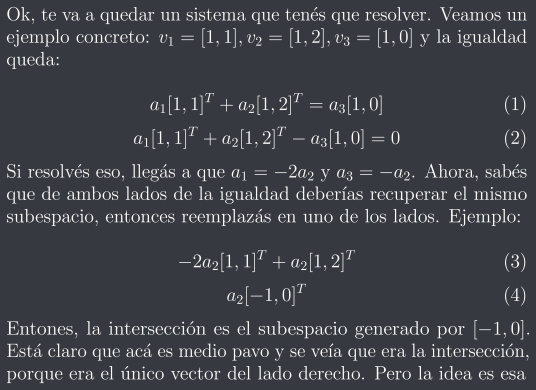

## **Ejercicios**

### **Ejercicios generales**

#### **1.** Encontrar conjunto de generadores minimales de los siguientes subespacios.


##### 1.**a.** $\mathbb{S} = \left\{x \in \mathbb{R}^3 : x_1 - x_2 -x_3 = x_1 - x_2 - 2x_3 = 0 \right\}$

In [15]:
A = Matrix([[1,-1,-1],
            [1,-1,-2]])
Z = zeros(2,1)
sol, sp, gen = gauss_jordan_con_generadores(A, Z)

##### 1.**b.** $\mathbb{S} = \left\{ p \in \mathbb{R}_2[x] : p(1)=p'(1)=0 \right\}$

In [16]:
# Variables simbólicas:
x, a0, a1, a2 = symbols('x, a0, a1, a2')

# Polinomio de R2[x] genérico
p = a0 + a1*x + a2*x**2

# Evalúo el polinomio y la derivada en 1
p_1 = p.subs(x,1)           #p(1) = a0 + a1 + a2
pp_1 = diff(p,x).subs(x,1)  #p'(1) = a1 + 2.a2

# Armo el sistema para encontrar los coeficientes a0, a1, a2:
A = Matrix([[1, 1, 1],
            [0, 1, 2]])
b = zeros(2,1)

# Resuelvo
sol, sp, gen = gauss_jordan_con_generadores(A, Z)

##### 1.**c.** $ \mathbb S = \left\{ p \in \mathbb{R}_3[x] : \quad \int_{-1}^{1} p(x) \,dx = 0, \quad \int_{-1}^{1} (x-1)p(x) \,dx  = 0 \right\}$

In [17]:
# Variables simbólicas:
x, a0, a1, a2, a3 = symbols('x, a_0, a_1, a_2, a_3')


# Polinomio de R2[x] genérico
p = a0 + a1*x + a2*x**2 + a3*x**3

#Hago la primera integral
p_int1 = integrate(p, (x,-1,1))

#Para hacer la segunda integral, distribuyo: ∫xp - p dx = ∫xp dx - ∫p dx = ∫xp dx (∫p = 0 por enunciado) 
p_int2 = integrate(x*p, (x,-1,1))

# Armo el sistema para encontrar los coeficientes a0, a1, a2:
A = Matrix([[2, 0, Rational('2/3'), 0],
            [0, Rational('2/3'), 0, Rational('2/5')]])
b = zeros(2,1)

# Resuelvo
sol, sp, gen = gauss_jordan_con_generadores(A, Z)
B = Matrix([[1, x, x**2, x**3]])
B*gen[0], B*gen[1]

⎛⎡ 2   1⎤  ⎡ 3   3⋅x⎤⎞
⎜⎢x  - ─⎥, ⎢x  - ───⎥⎟
⎝⎣     3⎦  ⎣      5 ⎦⎠

##### 1.**d.** $ \mathbb S = \left\{ X \in \mathbb R^{2 \times 2} : X\begin{bmatrix}3&0\\0&5\end{bmatrix} = \begin{bmatrix}3&0\\0&5\end{bmatrix} X \right\}$

In [18]:
#Lo resuelvo sabiendo que X debe ser del estilo 

#X = Matrix([[a, 0],
#            [0, b]])
#La rta va a ser cualquier conjunto cuyas soluciones sean de esa forma

####**2.** Determinar si el conjunto es linealmente independiente.

##### 2.**a.** Sea $\mathbb{V}$ un $\mathbb{K}$-espacio vectorial. Se considera al conjunto de vectores linealmente independiente $\{v_1, v_2, v_3 \} \subset \mathbb{V}$ y se definen $w_1$, $w_2$, $w_3$ mediante 
$$ 
\begin{align*}
    w_1 &= 2v_1 + v_3 \\
    w_2 &= v_1 - v_2 + v_3 \\
    w_3 &= v_1 + v_2 
\end{align*} 
$$ 
¿El conjunto $\{w_1, w_2, w_3 \}$ es linealmente independiente?

In [19]:
w1 = Matrix([2,0,1])
w2 = Matrix([1,-1,1])
w3 = Matrix([1,1,0])
A = Matrix.hstack(w1,w2,w3)
A.det() #Como el determinante es 0, entonces el conjunto no es linealmente independiente

##### 2.**b.** Determinar si el conjunto $\left\{ 2+x^2, 1-x+x^2, 1+x\right\} \subset \mathbb{R}_2[x]$ es linealmente independiente.

Sabemos que el conjunto $\left\{ 1, x, x^2 \right\} \subset \mathbb{R}_2[x]$ es linealmente independiente, y que el conjunto anterior se puede escribir como

$$
\begin{align*}
    2+x^2 &= 2 \cdot 1 + 0 \cdot x + 1 \cdot x^2 \\
    1-x+x^2 &= 1 \cdot 1 + (-1) \cdot x + 1 \cdot x^2 \\
    1+x &= 1 \cdot 1 + 1 \cdot x + 0 \cdot x^2
\end{align*}  
$$

por lo tanto, por el mismo razonamiento que antes podemos mostrar que el conjunto es linealmente independiente si, y sólo si, $\mathrm{det}(A) \neq 0$. En este caso, la matriz $A$ es la misma que antes, por lo que el conjunto es linealmente dependiente de nuevo.

In [20]:
w1 = Matrix([2,0,1])
w2 = Matrix([1,-1,1])
w3 = Matrix([1,1,0])
A = Matrix.hstack(w1,w2,w3)
A.det() #Como el determinante es 0, entonces el conjunto no es linealmente independiente

##### 2.**c.** Determinar si el conjunto $\left\{ \begin{bmatrix} 3 \\ 0 \\ 1 \\ 1 \end{bmatrix}, \begin{bmatrix} 0 \\ 0 \\ 2 \\ 1 \end{bmatrix}, \begin{bmatrix} 2 \\ 0 \\ 1 \\ 0 \end{bmatrix} \right\}$ es linealmente independiente

In [21]:
A = Matrix([[3,0,2],
            #[0,0,0], -> puedo eliminar esta fila
            [1,2,1],
            [1,1,0]])
A.det() #Como el determinante no es 0, entonces el conjunto es linealmente independiente

####**3.** Hallar $a$ para que el conjunto sea linealmente independiente:

##### 3.**a.** Sea $B = \{v_1, v_2, v_3 \}$ un conjunto linealmente independiente. Hallar el valor de $a \in \mathbb R$ tal que $\{v_1 + a v_2 + 3 v_3, 4v_1 + 5v_2 +  7v_3, av_1 + v_2 + v_3 \}$ sea linealmente independiente.

In [22]:
#Como v1, v2, v3 forman una base, escribo los vectores con las coordenadas de la base:

a = Symbol('a') # Definición de la variable simbólica

w1 = Matrix([1,4,a])
w2 = Matrix([a,5,1])
w3 = Matrix([3,7,1])
A = [w1,w2,w3]
encontrar_a(A,a) #para que el conjunto sea LI, debe ser diferente a esos valores

##### 3.**b.** Para cada $a\in \mathbb R$, sea $\mathcal G_a \subset \mathbb R^{2\times 2}$ el conjunto definido por $$\mathcal G_a = \left\{\begin{bmatrix}5&3\\3&a\end{bmatrix}, \begin{bmatrix}1&a\\a&1\end{bmatrix}, \begin{bmatrix}3&2\\2&3\end{bmatrix} \right\}.$$ Hallar el valor de $a$ para el cual $\mathcal G_a$ es linealmente independiente.

In [23]:
#Uso la base canónico de R4: B

a = Symbol('a') # Definición de la variable simbólica

w1 = Matrix([5,3,3,a]) #en coordenadas de la base B
w2 = Matrix([1,a,a,1]) #en coordenadas de la base B
w3 = Matrix([3,2,2,3]) #en coordenadas de la base B
A = [w1,w2,w3]
# rango(Matrix.hstack(*A)) #lo hago a mano porque en Python no se puede: me tiene que dar rango 3
#Triangulo y me queda
"""
A = Matrix([[1,    5,    3],
            [0, 3-5a, 2-3a],
            [0,  a-5,    0],
            [0,    0,    0]])
Veo que entonces el determinante de
           [[3-5a, 2-3a],
            [ a-5,    0]]
debe ser distinto de 0
            
"""
M = Matrix([[3-5*a, 2-3*a],
            [ a-5,    0]])
solveset(det(M), a) #debe ser distinto de 2/3 y de 5

####**4.** Determinar la solución de Ax = b.


##### 4.**a.** Sean $A\in\mathbb{R}^{m\times n}$ y $b\in{\rm col}(A)$. 

\begin{equation} A = \begin{bmatrix}1&2&1&3&3\\2&4&0&4&4\\1&2&3&5&5\\2&4&0&4&7\end{bmatrix}, b = \begin{bmatrix}1\\1\\2\\1\end{bmatrix}\end{equation}.

En lo que sigue mostramos un método para hallar el único $x_f\in{\rm fil}(A)$ tal que $Ax=b$.

1. Determinar una base $B_f=\left\{f_1,f_2,\dots, f_r\right\}$ del espacio ${\rm fil}(A)$.

2. Escribir $x_f=\sum_{i=1}^r\xi_if_i$.

3. Observar que 
\begin{align*}
Ax_f
&=A\left(\sum_{i=1}^r\xi_if_i\right)\\
=&\sum_{i=1}^r\xi_iAf_i\\
&=A\underbrace{\begin{bmatrix}f_1&f_2&\cdots&f_r\end{bmatrix}}_{F\in\mathbb{R}^{n\times r}}\underbrace{\begin{bmatrix}\xi_1\\\xi_2\\\vdots\\\xi_r\end{bmatrix}}_{\xi\in\mathbb{R}^r}
\end{align*}

4. Resolver el sistema $AF\xi=b$. 

5. Si $\xi_a\in\mathbb{R}^r$ es la única solución del sistema $AF\xi=b$, entonces $x_f=F\xi_a$.

In [24]:
A=Matrix([[1,2,1,3,3],[2,4,0,4,4],[1,2,3,5,5],[2,4,0,4,7]])
b=Matrix([1,1,2,1])

#Se que Fil_A . ε = x -> x es el resultado de una combinación lineal de los generadores de fil
#También se que A.x = b
#Tengo:
#Fil_A . ε = x
#A.Fil_A . ε = A. x -> Multiplico ambos lados por A
#A.Fil_A . ε = b    -> A.x = b

#Calculo A.Fil_A
fil_A = A.T.columnspace() # Determinar una base de fil(A): f_1, f_2, ..., f_r
F = Matrix.hstack(*fil_A) # Construir una matriz F=[f_1 f_2 ... f_r] 
A_F = A * F

#Calculo ε sabiendo que A.Fil_A . ε = b 
x_aux, p = A_F.gauss_jordan_solve(b)

#Calculo x sabiendo que Fil_A.ε = x 
x_f = F * x_aux #la solucion es x_f -> el resultado de la combinacion lineal

##### 4.**b.** 
Definir cuáles de las siguientes opciones son soluciones del sistema $Ax=b$ con
$$
\begin{align}
A = 
\begin{bmatrix}
2 & 2 & 2 & 0 \\
1 & 4 & 3 & 1 \\
-3 & 0 & -1 & 1 
\end{bmatrix} & & 
b = 
\begin{bmatrix}
4 \\ 10 \\ 2
\end{bmatrix}
\end{align}
$$
1. $S = 
\begin{bmatrix} 
1 & 2 & 1 & 0
\end{bmatrix}^T + gen \left\{ 
\begin{bmatrix} 
-1 & -2 & 3 & 0
\end{bmatrix}^T, 
\begin{bmatrix} 
1 & -1 & 0 & 3
\end{bmatrix}^T
\right\}$

2. $S = 
\begin{bmatrix} 
-1 & 2 & 1 & 0
\end{bmatrix}^T + gen \left\{ 
\begin{bmatrix} 
-1 & -2 & 3 & 0
\end{bmatrix}^T, 
\begin{bmatrix} 
1 & -1 & 0 & 3
\end{bmatrix}^T
\right\}$

3. $S = 
\begin{bmatrix} 
-\frac{1}{3} & \frac{7}{3} & 0 & 1
\end{bmatrix}^T + gen \left\{ 
\begin{bmatrix} 
0 & -1 & 1 & 1
\end{bmatrix}^T, 
\begin{bmatrix} 
1 & -2 & 1 & 4
\end{bmatrix}^T
\right\}$

4. $S = 
\begin{bmatrix} 
-\frac{1}{3} & \frac{7}{3} & 0 & 1
\end{bmatrix}^T + gen \left\{ 
\begin{bmatrix} 
1 & -3 & 2 & 1 
\end{bmatrix}^T, 
\begin{bmatrix} 
-1 & 2 & -1 & -4
\end{bmatrix}^T
\right\}$

In [25]:
A = Matrix([[ 2, 2,  2, 0],
            [ 1, 4,  3, 1],
            [-3, 0, -1, 1]])

b = Matrix([4,10,2])

#Intento la forma más facil:
A.gauss_jordan_solve(b) #La solución que me da no está entre las opciones

#Analizo uno por uno sabiendo que A.solucion_particular = B y que A.generador = 0:

#1
sp = Matrix([1,2,1,0])
A*sp == B #No me da B, entonces descarto esta opción

#2
sp = Matrix([-1,2,1,0])
A*sp #Me da B, sigo

g1 = Matrix([-1,-2,3,0])
A*g1 #Me da 0, sigo

g2 = Matrix([1,-1,0,3])
A*g2 #Me da 0, entonces esta es la correcta

#3
sp = Rational('1/3') * Matrix([-1,7,0,3])
A*sp #Me da B, sigo

g1 = Matrix([0,-1,1,1])
A*g1 #Me da 0, sigo

g2 = Matrix([1,-2,1,4])
A*g2  #Me da 0, entonces esta es la correcta

#4
sp = Rational('1/3') * Matrix([-1,7,0,3])
A*sp #Me da B, sigo

g1 = Matrix([1,-3,2,1])
A*g1 #No me da 0, entonces descarto esta opción

⎡0 ⎤
⎢  ⎥
⎢-4⎥
⎢  ⎥
⎣-4⎦

####**5.** Sean las matrices $A \in \mathbb{R}^{a \times b}$ y $B \in \mathbb{R}^{c \times d}$ dos matrices tales que: $AB$ = [...] y rango(...) = ...

##### 5.**a**. Sea $A \in \mathbb{R}^{3 \times 5}$ y $B \in \mathbb{R}^{5 \times 4}$ dos matrices tales que:
$$
AB = 
\begin{bmatrix}
-\frac{1}{2} &  1 & -2 & 1 \\
\frac{1}{2} & -1 & -1 & 2 \\
1 & -2 &  1 & 1 
\end{bmatrix}
$$
con $\mathrm{rg}(B)=2$. Hallar una base del $\mathrm{Nul}(B)$.

In [26]:
#Nul(B) incluido en Nul(AB) 
#Analizo las dimensiones: dim(nul(B)) = n − rango(B) ->  dim(nul(B)) = 4 - 2 = 2
AB = Rational('1/2')*Matrix([[-1, 2, -4, 2],
                             [1, -2, -2, 4],
                             [2, -4, 2, 2]])

AB.nullspace() # dim(nul(AB)) = 2

#Como las dimensiones son iguales, y Nul(B) está en Nul(AB), no queda otra a que Nul(B) = Nul(AB).
#Si hallo una base de Nul(AB), entonces tengo una base de Nul(B). La base la encontré antes:

AB.nullspace()

⎡⎡2⎤  ⎡-2⎤⎤
⎢⎢ ⎥  ⎢  ⎥⎥
⎢⎢1⎥  ⎢0 ⎥⎥
⎢⎢ ⎥, ⎢  ⎥⎥
⎢⎢0⎥  ⎢1 ⎥⎥
⎢⎢ ⎥  ⎢  ⎥⎥
⎣⎣0⎦  ⎣1 ⎦⎦

##### 5.**b.** Sea $A \in \mathbb{R}^{3 \times 3}$ y $B \in \mathbb{R}^{3 \times 4}$ dos matrices tales que:

$$
AB = 
\begin{bmatrix}
10 & -10 & -5 & 5 \\
11 & -11 & -4 & 7 \\
11 & -11 & -5 & 6
\end{bmatrix}
$$

donde $\mathrm{rg}(A)=3$, y $\begin{bmatrix} -1 & -2 & 1 & -2 \end{bmatrix}^T$ es solución de $Bx=\begin{bmatrix}b_1 & b_2 & b_3\end{bmatrix}^T$. Encontrar el conjunto de todas las soluciones del sistema $Bx=\begin{bmatrix}b_1 & b_2 & b_3\end{bmatrix}^T$.

In [27]:
#Veo que rango de A es igual a la cantidad de columnas de A. Entonces,
#Ax = b
#x = A.inv().b

#También se que el Nul(B) pertenece al Nul(AB)
#Como existe A.inv(), entonces Nul(AB) pertenece al Nul(B)
#Concluímos que Nul(B) = Nul(AB)

AB = Matrix([[10, -10, -5, 5],
             [11, -11, -4, 7],
             [11, -11, -5, 6]])

#Puedo escribir Bx = b como la solución particular más los generadores de Nul(B)
sp = Matrix([-1, -2, 1, -2])
generadores = AB.nullspace()

##### 5.**c.** Sean $A \in \mathbb{R}^{3 \times 3}$ y $B \in \mathbb{R}^{3 \times 4}$ dos matrices tales que:

$$
AB = 
\begin{bmatrix}
10 & -10 & -5 & 5 \\
11 & -11 & -4 & 7 \\
11 & -11 & -5 & 6
\end{bmatrix}
$$

donde $\mathrm{rg}(A)=3$, y $\begin{bmatrix} -1 & -2 & 1 & -2 \end{bmatrix}^T$ es solución de $Bx=\begin{bmatrix}b_1 & b_2 & b_3\end{bmatrix}^T$. Encontrar $\alpha \in \mathbb{R}$ tal que

$$
S = \left\{ \hspace{.5em}
\begin{bmatrix}
-1 \\ -2 \\ 1 \\ -2
\end{bmatrix} +
a_1 \begin{bmatrix}
\alpha \\ \alpha^2 \\ 0 \\ 0
\end{bmatrix}
a_2 \begin{bmatrix}
0 \\ -1 \\ \alpha \\ -1
\end{bmatrix} :
a_1, a_2 \in \mathbb{R} \hspace{.5em}
\right\}
$$

sea el conjunto de todas las soluciones del sistema $Bx=\begin{bmatrix}b_1 & b_2 & b_3\end{bmatrix}^T$.

In [28]:
#Veo que rango de A es igual a la cantidad de columnas de A. Entonces,
#Ax = b
#x = A.inv().b

#También se que el Nul(B) pertenece al Nul(AB)
#Como existe A.inv(), entonces Nul(AB) pertenece al Nul(B)
#Concluímos que Nul(B) = Nul(AB)

AB = Matrix([[10, -10, -5, 5],
             [11, -11, -4, 7],
             [11, -11, -5, 6]])

#Los generadores del nul(AB) deben ser los mismos que de S
#Armo una matriz de los generadores del nul(B) y de los de S:

a = symbols('a')
nul_AB = AB.nullspace()
D = Matrix.hstack(*[v for v in nul_AB],Matrix([[a, 0],[a**2, -1],[0, a],[0,-1]]))

#Pido que la matriz sea LD:
determinante = det(D)
roots(determinante) #para que sea ld el determinante tiene que ser igual a 0 -> a = 0 o a = 1 

##### 5.**d.**  Sea $A \in \mathbb{R}^{3 \times 3}$ y $B \in \mathbb{R}^{3 \times 4}$ dos matrices tales que:

$$
AB = 
\begin{bmatrix}
10 & -10 & -5 & 5 \\
11 & -11 & -4 & 7 \\
11 & -11 & -5 & 6
\end{bmatrix}
$$

donde $\mathrm{rg}(A) = 3$, y $B$ satisface que $B \begin{bmatrix} 1 & 1 & 1 & 1 \end{bmatrix}^T = \begin{bmatrix} 0 & 3 & 1 \end{bmatrix}^T$, $B \begin{bmatrix} 1 & 0 & 1 & 0 \end{bmatrix}^T = \begin{bmatrix} 5 & 7 & 6 \end{bmatrix}^T$.

Hallar todas las soluciones del sistema $Bx=\begin{bmatrix}5 & 1 & 4\end{bmatrix}^T$.

In [29]:
#Veo que rango de A es igual a la cantidad de columnas de A. Entonces,
#Ax = b
#x = A.inv().b

#También se que el Nul(B) pertenece al Nul(AB)
#Como existe A.inv(), entonces Nul(AB) pertenece al Nul(B)
#Concluímos que Nul(B) = Nul(AB)

AB = Matrix([[10, -10, -5, 5],
             [11, -11, -4, 7],
             [11, -11, -5, 6]])

#Busco el nulo de B:
nul_B = AB.nullspace()

#Se que la solucion de Ax = b va a ser x = sp + gen(nul(B))
#Los generadores del nul de B ya los tengo, busco la solucion particular:
#Tengo estos datos del enunciado:
#   α.B[1 1 1 1]t = α.[0 3 1]t        y          β.B[1 0 1 0]t = β.[5 7 6]t
#Junto la información
#   α.B[1 1 1 1]t + β.B[1 0 1 0]t = α.[0 3 1]t + β.[5 7 6]t = [5 1 4]t

#Busco la combinación lineal que me provoque un [5 1 4]

A = Matrix([[0, 5],
            [3, 7],
            [1, 6]])
b = Matrix([5, 1, 4])

x, pivot = A.gauss_jordan_solve(b)

#Armo la solucion particular
sp = x[0,0]*Matrix([1, 1, 1, 1]) + x[1,0]*Matrix([1, 0, 1, 0])

#x = sp + gen(nul(B))

##### 5.**e.** Sean $A \in \mathbb{R}^{3 \times 3}$ y $B \in \mathbb{R}^{3 \times 4}$ dos matrices tales que $rango(B) = 2$,
$$AB = \begin{bmatrix}1&-1&1&2\\2&1&-1&1\\1&2&-2&-1\end{bmatrix} \quad \text y \quad  B \begin{bmatrix}1&1\\0&1\\1&1\\0&1\end{bmatrix} = \begin{bmatrix}2&1\\3&-2\\2&1\end{bmatrix}$$
Las soluciones de la ecuación $Bx = \begin{bmatrix}0&-7&0\end{bmatrix}^T$ son de la forma:

$\quad$ **a.** $x = \begin{bmatrix}1&2&1&2\end{bmatrix}^T + a\begin{bmatrix}-1&1&0&1\end{bmatrix}^T + b\begin{bmatrix}0&1&1&0\end{bmatrix}^T$.

$\quad$ **b.** $x = \begin{bmatrix}3&1&3&1\end{bmatrix}^T + a\begin{bmatrix}-1&-1&1&0\end{bmatrix}^T + b\begin{bmatrix}0&1&0&1\end{bmatrix}^T$.

$\quad$ **c.** $x = \begin{bmatrix}-1&1&-1&1\end{bmatrix}^T + a\begin{bmatrix}-1&1&0&1\end{bmatrix}^T + b\begin{bmatrix}1&-1&1&0\end{bmatrix}^T$.

$\quad$ **d.** $x = \begin{bmatrix}3&2&3&2\end{bmatrix}^T + a\begin{bmatrix}-1&-1&1&0\end{bmatrix}^T + b\begin{bmatrix}1&0&0&1\end{bmatrix}^T$.

In [30]:
#Nul(B) incluido en Nul(AB) 
#Analizo las dimensiones: dim(nul(B)) = n − rango(B) ->  dim(nul(B)) = 4 - 2 = 2
AB = Matrix([[1, -1,  1, 2],
             [2,  1, -1, 1],
             [1,  2, -2, -1]])

AB.nullspace() # dim(nul(AB)) = 2

#Puedo descartar opciones, sabiendo que los generadores tienen que generar el mismo subespacio que el nulo de AB
#opc a:
Matrix.hstack(*AB.nullspace(), Matrix([-1,1,0,1]),Matrix([0,1,1,0])).rref() #generan mismo subespacio
dos_subespacios_generan_el_mismo_subespacio(AB.nullspace(), [Matrix([-1,1,0,1]),Matrix([0,1,1,0])]) #checkeo
#opc b:
Matrix.hstack(*AB.nullspace(), Matrix([-1,-1,1,0]),Matrix([0,1,0,1])).rref() #no generan mismo subespacio
dos_subespacios_generan_el_mismo_subespacio(AB.nullspace(), [Matrix([-1,-1,1,0]),Matrix([0,1,0,1])]) #checkeo
#descarto opc b
#opc c:
Matrix.hstack(*AB.nullspace(), Matrix([-1,-1,0,1]),Matrix([1,-1,1,0])).rref() #no generan mismo subespacio
dos_subespacios_generan_el_mismo_subespacio(AB.nullspace(), [Matrix([-1,-1,0,1]),Matrix([1,-1,1,0])]) #checkeo
#descarto opc c
#opc d:
Matrix.hstack(*AB.nullspace(), Matrix([-1,-1,1,0]),Matrix([1,0,0,1])).rref() #no generan mismo subespacio
dos_subespacios_generan_el_mismo_subespacio(AB.nullspace(), [Matrix([-1,-1,1,0]),Matrix([1,0,0,1])]) #checkeo
#descarto opc d

#Veo que la correcta es la opc a, igual termino el ej:
#Se que B(a * [1 0 1 0] + b [1 1 1 1]) = a * [2 3 2] + b * [1 -2 1] = [0 -7 0]
#Busco combinación lineal tal que [0 -7 0] es cl de [2 3 2] y [1 -2 1]
M = Matrix([[2,  1],
            [3, -2],
            [2,  1]])
sol, coeficientes, _ = gauss_jordan_con_generadores(M, Matrix([0, -7, 0]))
#Se que B(-1 * [1 0 1 0] + 2 * [1 1 1 1]) = [0 -7 0]
sp = Matrix([[1, 1],
             [0, 1],
             [1, 1],
             [0, 1]]) * coeficientes

#Si esa sol no está en las opciones, tengo que ver que la sol particular que me dan
# cumpla que sp_opcion = sp + gen(Nul(AB))

####**6.** **(Matriz cambio de coordenadas)** Sean $\mathcal{B}_1 := \left\{ ... \right\}$ y $\mathcal{B}_2 := \left\{ ... \right\}$ dos bases de ... 

##### 6.**a.** Sean $\mathcal{B}_1 := \left\{ \begin{bmatrix} 1\\ i \end{bmatrix}, \begin{bmatrix} 0\\ 1+i \end{bmatrix} \right\}$ y $\mathcal{B}_2 := \left\{ \begin{bmatrix} -i\\2 \end{bmatrix}, \begin{bmatrix} 1-i\\ 1 \end{bmatrix} \right\}$ dos bases de $\mathbb{C}^2$. Hallar la matriz de cambio de coordenadas de la base $\mathcal{B}_1$ en la base $\mathcal{B}_2$. Dado $[v]^{\mathcal{B}_2} = \begin{bmatrix} i \\ i\end{bmatrix}$, calcular $[v]^{\mathcal{B}_1}$.

In [31]:
v1 = Matrix([1,I])
v2 = Matrix([0,1+I])
MB1 = Matrix.hstack(v1,v2)

w1 = Matrix([-I,2]) 
w2 = Matrix([1-I,1])
MB2 = Matrix.hstack(w1,w2)

M_B1_B2 = (MB2.inv())*MB1
M_B1_B2 = simplify(M_B1_B2)

M_B2_B1 = M_B1_B2.inv() #Traduzco de B2 a B1

v_B2 = Matrix([i,i])
v_B1 = simplify(M_B2_B1 * v_B2) #M_B2_B1 * v_B2 = v_B1

##### 6.**b.** Sean $\mathcal{B}_1 := \left\lbrace 1,x,x^2\right\rbrace$ y $\mathcal{B}_2 := \left\lbrace 2x^2-1, 4x, 3x^2-x\right\rbrace$ dos bases de $\mathbb{R}_2[x]$. Hallar la matriz de cambio de coordenadas de la base $\mathcal{B}_1$ en la base $\mathcal{B}_2$.

In [32]:
w1_B1 = Matrix([-1,0,2]) #primer elemento de B2 escrito en términos de B1 (coordenadas)
w2_B1 = Matrix([0,4,0])  #segundo elemento de B2 escrito en términos de B1 (coordenadas)
w3_B1 = Matrix([0,-1,3]) #tercer elemento de B2 escrito en términos de B1 (coordenadas)

M_B2_B1 = Matrix.hstack(w1_B1,w2_B1,w3_B1) #matriz que traduce de B2 a B1
M_B1_B2 = M_B2_B1.inv()
M_B1_B2

⎡-1    0    0  ⎤
⎢              ⎥
⎢1/6  1/4  1/12⎥
⎢              ⎥
⎣2/3   0   1/3 ⎦

##### 6.**c.** Sea $\mathcal{B}_1$ la base de $\mathbb{R}^3$ definida por
\begin{equation*} 
\mathcal{B}_1 := \left\{ \begin{bmatrix} 1\\ 2\\ 1 \end{bmatrix}, \begin{bmatrix} 2\\ 5\\ 0 \end{bmatrix}, \begin{bmatrix} 3\\ 3\\ 8 \end{bmatrix} \right\}.
\end{equation*}
y $\mathcal{B}_2$ otra base de $\mathbb{R}^3$ tal que la matriz de cambio de coordenadas de la base $\mathcal{B}_1$ en la base $\mathcal{B}_2$ sea
\begin{equation*} 
M_{\mathcal{B}_1}^{\mathcal{B}_2} := \begin{bmatrix} 1 & 0 & 0 \\ 1 & 4 & 0\\ 4 & 2 & 2 \end{bmatrix}.
\end{equation*}

(a) Hallar la base $\mathcal{B}_2$.

(b) Hallar la matriz de cambio de coordenadas de la base $\mathcal{E}$ en la base $\mathcal{B}_2$, siendo $\mathcal{E}$ la base canónica de $\mathbb{R}^3$.

(c) Para cada $x \in \mathbb{R}^3$, determinar la expresión del vector de coordenadas de $x$ en la base $\mathcal{B}_2$.

In [33]:
#(a).

v1 = Matrix([1,2,1])
v2 = Matrix([2,5,0])
v3 = Matrix([3,3,8])
M_B1 = Matrix.hstack(v1,v2,v3)

M_B1_B2 = Matrix([[1,0,0],[1,4,0],[4,2,2]])
M_B2_B1 = M_B1_B2.inv()

M_B2 = M_B1 * M_B2_B1 

#(b).
v1 = Matrix([1,0,0])
v2 = Matrix([0,1,0])
v3 = Matrix([0,0,1])
M_E = Matrix.hstack(v1,v2,v3)

#FORMA 1: usando el resultado anterior
#M_B2 ya lo tengo
M_B2_E = M_E.inv()*M_B2 #notar que es lo mismo que M_B2

#FORMA 2: sin usar resultado anterior
M_B1_E = M_B1
M_B2_E = M_B1_E*M_B2_B1 

#(c.) Quiero a tal que M_B2 . a = x
x1, x2, x3 = symbols('x1 x2 x3') 
x = Matrix([x1, x2, x3])

a = (M_B2.inv())*x #solucion de M_B2.a = x

##### 6.**d.** Sea $B$ la base de $\mathbb{R}^3$ definida por
\begin{equation*} 
B := \left\{ \begin{bmatrix} 1\\ 1\\ 0 \end{bmatrix}, \begin{bmatrix} 1\\ 0\\ 1 \end{bmatrix}, \begin{bmatrix} 0\\ 1\\ 1 \end{bmatrix} \right\}.
\end{equation*}
Sea $C$ la base de $\mathbb{R}^3$ tal que la matriz de cambio de coordenadas de la base $C$ en la base $B$ sea
\begin{equation*} 
M_C^B := \frac12\begin{bmatrix} -3 & -3 & 3 \\ 5 & -1 & 1\\ -1 & 5 & 1 \end{bmatrix}.
\end{equation*}

Hallar el vector de coordenadas de $x = \begin{bmatrix}2&1&1\end{bmatrix}^T$ en la base $C$.

In [34]:
#Base B
v1 = Matrix([1,1,0])
v2 = Matrix([1,0,1])
v3 = Matrix([0,1,1])
B = [v1,v2,v3]
M_B_E = Matrix.hstack(*B)

#Matriz cambio de base C a B
M_C_B = Rational('1/2') * Matrix([[-3,-3, 3],
                                  [ 5,-1, 1],
                                  [-1, 5, 1]])
M_B_C = M_C_B.inv() 

#Vector a buscar coordenadas
x = Matrix([2, 1, 1])

#Lo traduzco a base B
x_B = M_B_E.inv() * x

#Lo traduzco a base C con el traductor de base B a C
x_C = M_B_C * x_B

#### **7.** Hallar la solución del problema $y'' - 3y' + 2y = 0$, sujeto a las condiciones iniciales $y(0) = 1$, $y'(0) = 0$.

In [90]:
D, I, x, e, a, b = symbols('D I x e a b')

p = x**2 - 3*x + 2
factor(p) #veo y escribo a mano
Ltext = '(D-2I)*(D-1I)'
NuL = nucleo_de_operador_diferencial(Ltext)
NuL = list(NuL)
yh = a*NuL[0] + b*NuL[1] #sol homogenea

#Analizo condiciones iniciales:

#y(0) = 1

yh.subs({x: 0}) #como tiene que ser igual a 1, entonces a+b = 1, a = 1-b 
yh = yh.subs({a: 1-b})

#y'(0) = 0
yh1 = diff(yh, x)
yh1.subs({x: 0}) #como tiene que ser igual a 0, entonces b+1 = 0, b = -1, a = 2 
yh = yh.subs({a: 2, b: -1})

#### **7.** Dadas $\mathbb{S} = \left\{ ...\right\}$ y $\mathbb{T} = \left\{ ... \right\}$. Hallar bases para el mayor subespacio contenido en ambos (infimo, la intersección) y el menor subespacio que contiene a ambos (supremo, la suma).

##### 7.**a.** Dadas $\mathbb{S} = \left\{x \in \mathbb{R}^5 : 2.x_1 - x_2 - x_3 = x_4 - 3.x_5 = 0 \right\}$ y $\mathbb{T} = \left\{x \in \mathbb{R}^5 : x_3 + x_4 = 0 \right\}$. Hallar bases para el mayor subespacio contenido en ambos y el menor subespacio que contiene a ambos

In [36]:
#CASO DOS SUBESPACIOS CON ECUACIONES

s1 = Matrix([2,-1,-1,0,0]).T
s2 = Matrix([0,0,0,1,-3]).T
S = Matrix.vstack(s1, s2)
T = Matrix([0,0,1,1,0]).T

#Intersección: infimo

M_ST = (Matrix.vstack(S,T)) #los vectores como filas
z = zeros(3, 1)
x, x_0, generadores_interseccion = gauss_jordan_con_generadores(M_ST, z)
generadores_interseccion        #El infimo esta generado por estos vectores

#Suma: supremo

#Ahora busco bases de cada subespacio
z = zeros(2, 1)
x, x_0, generadores_bs = gauss_jordan_con_generadores(S, z)
generadores_bs

z = zeros(1, 1)
x, x_0, generadores_bt = gauss_jordan_con_generadores(T, z)
generadores_bt

#Junto las bases
generadores_suma = union_S1_S2(generadores_bs, generadores_bt) #El supremo esta generado por estos vectores
generadores_suma

⎡⎡1/2⎤  ⎡1/2⎤  ⎡0⎤  ⎡1⎤  ⎡0 ⎤⎤
⎢⎢   ⎥  ⎢   ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢ 1 ⎥  ⎢ 0 ⎥  ⎢0⎥  ⎢0⎥  ⎢0 ⎥⎥
⎢⎢   ⎥  ⎢   ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢ 0 ⎥, ⎢ 1 ⎥, ⎢0⎥, ⎢0⎥, ⎢-1⎥⎥
⎢⎢   ⎥  ⎢   ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢ 0 ⎥  ⎢ 0 ⎥  ⎢3⎥  ⎢0⎥  ⎢1 ⎥⎥
⎢⎢   ⎥  ⎢   ⎥  ⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎣⎣ 0 ⎦  ⎣ 0 ⎦  ⎣1⎦  ⎣0⎦  ⎣0 ⎦⎦

##### 7.**b.** Dadas $\mathbb{S} = \left\{p \in \mathbb{R}_3[x] : p(1) = p(2) = 0 \right\}$ y $\mathbb{T} = gen\left\{x^3 - 5.x^2 + 6.x, x^2 - 5.x + 6 \right\}$. Hallar $\mathbb{S} \cap \mathbb{T}$ y $\mathbb{S} + \mathbb{T}$.

In [37]:
#CASO UN SUBESPACIO CON ECUACION, UN SUBESPACIO CON GENERADORES.

#Intersección: infimo

#Busco un polinomio que este en T
x, a, b = symbols('x, a, b')

p = a*(x**3 - 5*x**2 + 6*x) + b*(x**2 - 5*x + 6)

#Obtengo informacion con las ecuaciones de S
p1 = p.subs(x, 1) #me dice que b = -a -> se resuelve igualando a 0 pero no se puede hacer con Python 
p2 = p.subs(x, 2) #no me da informacion

#Coloco la informacion que obtuve en p
p_new = p.subs(b, -a) #ya tengo el polinomio, miro el generador:
generador_interseccion = p_new.subs(a, 1) 

#Suma: supremo
#Ahora busco bases de cada subespacio

#S
#Si los polinomios se anulan en 1 **y** 2, un polinomio es del estilo (x-1)(x-2)
#Como estamos en R3, y hay 2 ecuaciones: 4 - 2 = 2 -> cantidad de vectores de la base de S
#Busco los dos vectores haciendo (x-1)(x-2).q(x) con q(x) = mx + b
x, m, b = symbols('x, m, b')
s_aux = (x-1)*(x-2)
s = expand(s_aux*(m*x + b)) #saco factor comun b y factor comun m a mano (no se hacerlo en python)
s1 = x**3 - 3*x**2 + 2*x
s2 = x**2 - 3*x + 2
generadores_bs = [s1, s2]

#T
#Ya me lo da el enunciado
t1 = x**3 - 5*x**2 + 6*x
t2 = x**2 - 5*x + 6
generadores_bt = [t1, t2]

#Junto las bases: tengo cuatro vectores
#Se que no son LI porque dim(S+T) = dim(S) + dim(T) - dim(S∩T) = 2 + 2 - 1 = 3
#Tomo coordenadas en base B = {x^3, x^2, x, 1}
S = [Matrix([1, -3,  2, 0]), Matrix([0,  1, -3, 2])]
T = [Matrix([1, -5,  6, 0]), Matrix([0,  1, -5, 6])]

generadores_suma = union_S1_S2(S,T)
generadores_suma                #El supremo esta generado por estos vectores

⎡⎡1 ⎤  ⎡0 ⎤  ⎡1 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-3⎥  ⎢1 ⎥  ⎢-5⎥⎥
⎢⎢  ⎥, ⎢  ⎥, ⎢  ⎥⎥
⎢⎢2 ⎥  ⎢-3⎥  ⎢6 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣0 ⎦  ⎣2 ⎦  ⎣0 ⎦⎦

##### 7.**c.** $\mathbb{S_1}$ y $\mathbb{S_2}$ son los subespacios de $\mathbb{R}^4$ definidos por

$$
\mathbb{S}_1 := gen\left\{
  \begin{bmatrix} 1 & 0 & 2 & 1 \end{bmatrix}^T,
  \begin{bmatrix} 1 & 1 & 1 & 1 \end{bmatrix}^T \right\}
$$

$$
\mathbb{S}_2 := gen\left\{
  \begin{bmatrix} 4 & 2 & 2 & 0 \end{bmatrix}^T,
  \begin{bmatrix} 2 & 0 & 2 & 0 \end{bmatrix}^T \right\}
$$

In [38]:
#CASO DOS SUBESPACIOS CON GENERADORES

S1 = [Matrix([1,0,2,1]), Matrix([1,1,1,1])]
S2 = [Matrix([4,2,2,0]), Matrix([2,0,2,0])]

generadores_interseccion = interseccion_S1_S2_dos_lados(S1, S2) 
generadores_interseccion        #El infimo esta generado por estos vectores

#Junto las bases
generadores_suma = union_S1_S2(S1, S2)
generadores_suma                #El supremo esta generado por estos vectores

⎡⎡1⎤  ⎡1⎤  ⎡4⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢1⎥  ⎢2⎥⎥
⎢⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎥
⎢⎢2⎥  ⎢1⎥  ⎢2⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣1⎦  ⎣1⎦  ⎣0⎦⎦

#### **8.** Sean $\mathbb{S}_1$ y $\mathbb{S}_2$ los subespacios definidos por

$$
\begin{align}
\mathbb{S}_1 := \left\{ ... \right\} & & \mathbb{S}_2 := \left\{ ... \right\}.
\end{align}
$$

#### Hallar un subespacio $\mathbb{T}$ tal que...

##### 8.**a.** Sean $\mathbb{S}_1$ y $\mathbb{S}_2$ los subespacios de $\mathbb{R}^2$ definidos por

$$
\begin{align}
\mathbb{S}_1 := \left\{ x\in \mathbb{R}^2 : 2x_1 + x_2 = 0\right\} & & \mathbb{S}_2 := \left\{ x\in \mathbb{R}^2 : x_1 + x_2 = 0\right\}.
\end{align}
$$

Hallar un subespacio $\mathbb{T}$ de $\mathbb{R}^2$ tal que $\mathbb{S}_1 \oplus \mathbb{T} = \mathbb{S}_2 \oplus \mathbb{T} = \mathbb{R}^2$.

In [39]:
S1 = Matrix([[2, 1]])
z = zeros(1,1)
_, _, generadores_s1 = gauss_jordan_con_generadores(S1, z)
v1 = generadores_s1[0] #obtengo el unico vector

S2 = Matrix([[1, 1]])
z = zeros(1,1)
_, _, generadores_s2 = gauss_jordan_con_generadores(S2, z)
w1 = generadores_s2[0] #obtengo el unico vector

#Averiguo la dimension de T:
#dim(S1) + dim(T) = dim(R2)  y  dim(S2) + dim(T) = dim(R2) 
#  1     + dim(T) =   2      y     1    + dim(T) =   2
#          dim(T) =   1      y            dim(T) =   1

#Averiguo S1∩S2
S1_int_S2 = interseccion_S1_S2_dos_lados(generadores_s1, generadores_s2)
S1_int_S2 #la intersección es nula

#Averiguo S1+S2
#dim(S1+S2) = dim(S1) + dim(S2) = 2
S1_un_S2 = union_S1_S2(generadores_s1, generadores_s2) #S1+S2 = gen{s1, s2}
S1_un_S2 #supremo

#Construyo T:
#T = ((S1+S2) + U) = gen{v1+w1}
gen_T = v1+w1

##### 8.**b.** Sean $\mathbb{S}_1$ y $\mathbb{S}_2$ los subespacios de $\mathbb{R}^4$ definidos por

$$
\begin{align}
\mathbb{S}_1 := gen \left\{ \begin{bmatrix} 0 & 1 & -1 & 2\end{bmatrix}^T, \begin{bmatrix} 1 & 1 & 0 & 1\end{bmatrix}^T \right\} & & \mathbb{S}_2 := \left\{ \begin{bmatrix} 1 & 2 & 0 & 2 \end{bmatrix}^T, \begin{bmatrix} 0 & 1 & 0 & 1 \end{bmatrix}^T \right\}.
\end{align}
$$

Hallar un subespacio $\mathbb{T}$ de $\mathbb{R}^4$ tal que 

 **(a)** $\mathbb{S}_1 \oplus \mathbb{T} = \mathbb{S}_2 \oplus \mathbb{T} = \mathrm{Nul}\left( \begin{bmatrix} 0 & -1 & 1 & 1\end{bmatrix}\right)$.

 **(b)** $\mathbb{S}_1 \oplus \mathbb{T} = \mathbb{S}_2 \oplus \mathbb{T} = \mathbb{R}^4$.

In [40]:
#(a).
#Escribo dimensiones:
#   dim(V) = 3
#   dim(S1) = 2
#   dim(S2) = 2
#   dim(T) = dim(V) - dim(S1) = 1

#1.Busco base de S1∩S2: a.v1 + b.v2 = c.v3 + d.v4
s11, s12 = Matrix([0,1,-1,2]), Matrix([1,1,0,1])
S1 = [s11, s12]
s21, s22 = Matrix([1,2,0,2]), Matrix([0,1,0,1])
S2 = [s21, s22]

S1_int_S2 = interseccion_S1_S2_dos_lados(S1, S2)

#2.Extiendo las bases
v1 = Matrix([0, 1, -1, 2])
BS1 = [*S1_int_S2, v1]#le agrego algun vector del enunciado que sea LI con S1_int_S2

w1 = Matrix([1, 2, 0, 2])
BS2 = [*S1_int_S2, w1]#le agrego algun vector del enunciado que sea LI con S1_int_S2

#3.Busco S1+S2: tiene que tener dim(S1+S2) = dim(S1) + dim(S2) - dim(S1∩S2) = 2 + 2 - 1 = 3 

S1_un_S2 = union_S1_S2(BS1, BS2)
S1_un_S2

#3.Busco U para que (S1+S2)+U = Nul([0 -1 1 1])
#  dim(S1+S2) + dim(U) = dim(Nul([0 -1 1 1]))
#       3     + dim(U) = 3
#               dim(U) = 0

#Construyo T:
#T = gen{v1+w1}
gen_T = v1+w1
gen_T

⎡1 ⎤
⎢  ⎥
⎢3 ⎥
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎣4 ⎦

In [41]:
#(b).
#Escribo dimensiones: dim(V) = 4, dim(S1) = 2, dim(S2) = 2, dim(T) = dim(V) - dim(S1) = 2

#1.Busco base de S1∩S2: a.v1 + b.v2 = c.v3 + d.v4
s11, s12 = Matrix([0,1,-1,2]), Matrix([1,1,0,1])
S1 = [s11, s12]
s21, s22 = Matrix([1,2,0,2]), Matrix([0,1,0,1])
S2 = [s21, s22]

S1_int_S2 = interseccion_S1_S2_dos_lados([Matrix([0,1,-1,2]), Matrix([1,1,0,1])], [Matrix([1,2,0,2]), Matrix([0,1,0,1])])
S1_int_S2        #El infimo esta generado por estos vectores

#2.Extiendo las bases
v1 = Matrix([0, 1, -1, 2])
BS1 = [*S1_int_S2, v1]#le agrego algun vector del enunciado que sea LI con S1_int_S2

w1 = Matrix([1, 2, 0, 2])
BS2 = [*S1_int_S2, w1]#le agrego algun vector del enunciado que sea LI con S1_int_S2

#3.Busco S1+S2: tiene que tener dim(S1+S2) = dim(S1) + dim(S2) - dim(S1∩S2) = 2 + 2 - 1 = 3 

S1_un_S2 = union_S1_S2(S1, S2)#escribo los vectores de S1 y S2

#3.Busco U para que (S1+S2) + U = R4
#  dim(S1+S2) + dim(U) = dim(Nul([0 -1 1 1]))
#       3     + dim(U) = 4
#               dim(U) = 1
#FORMA 1: Utilizo la matriz del enunciado: [0 -1 1 1]
u = Matrix([0, -1, 1, 1])

#FORMA 2: Si no se me ocurre nada, agrego la base canónica y triangulo: Principio de sustitución de Steinez
A_li = encontrar_vector_li_a_conjunto(S1_un_S2)
display(A_li) #veo que u = [0, 1, 0, 0]
u = Matrix([0, 1, 0, 0])

#Construyo T:
#T = gen{v1+w1, u}
gen1_T = v1+w1
gen2_T = u
gen_T = [gen1_T, gen2_T]


⎡⎡0 ⎤  ⎡1⎤  ⎡1⎤  ⎡0⎤⎤
⎢⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢1 ⎥  ⎢1⎥  ⎢2⎥  ⎢1⎥⎥
⎢⎢  ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎥
⎢⎢-1⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢  ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣2 ⎦  ⎣1⎦  ⎣2⎦  ⎣0⎦⎦

##### 8.**c.** Sean $\mathbb{S}_1$ y $\mathbb{S}_2$ los subespacios de $\mathbb{R}^4$ definidos por

$$
\begin{align}
\mathbb{S}_1 := \left\{ x\in \mathbb{R}^4 : x_1 - x_3 = x_2 + x_4 = 0\right\} & & \mathbb{S}_2 := \left\{ x\in \mathbb{R}^4 : x_1 + x_3 =x_2 - x_4 = 0\right\}.
\end{align}
$$

El valor del subespacio $\mathbb{T}$ de $\mathbb{R}^4$ tal que $\mathbb{S}_1 \oplus \mathbb{T} = \mathbb{S}_2 \oplus \mathbb{T} = \mathbb{R}^4$ es:

$\quad \checkmark \quad \mathbb T = gen\{\begin{bmatrix}1&1&1&1\end{bmatrix}^T, \begin{bmatrix}1&1&-1&-1\end{bmatrix}^T\}$

In [42]:
#Escribo dimensiones: dim(V) = 4, dim(S1) = 2, dim(S2) = 2, dim(T) = dim(V) - dim(S1) = 2

#Busco S1
S1 = Matrix([[1, 0, -1, 0],
             [0, 1,  0, 1]])
z = zeros(2,1)
_, _, generadores_s1 = gauss_jordan_con_generadores(S1, z)
v1, v2 = generadores_s1

#Busco S2
S2 = Matrix([[1, 0, 1, 0],
             [0, 1, 0, -1]])
z = zeros(2,1)
_, _, generadores_s2 = gauss_jordan_con_generadores(S2, z)
w1, w2 = generadores_s2

#Veo que el T dado sea LI con S1 y con S2:
opcion_d = [Matrix([1,1,1,1]), Matrix([1,1,-1,-1])]

Matrix.hstack(v1, v2, *opcion_d).rref() #veo que es LI a S1
Matrix.hstack(w1, w2, *opcion_d).rref() #veo que es LI a S2
#Conclusión: la correcta es la opc d.

#_____________________________

# Si me piden hallarlo:
#Averiguo S1∩S2
S1_int_S2 = interseccion_S1_S2_dos_lados(generadores_s1, generadores_s2)
S1_int_S2 #la intersección es nula

#Averiguo S1+S2
#dim(S1+S2) = dim(S1) + dim(S2) = 2
S1_un_S2 = union_S1_S2(generadores_s1, generadores_s2) #S1+S2 = gen{s1, s2}
S1_un_S2 #supremo

#Construyo T:
#T = ((S1+S2) + U) = gen{v1+w1}
gen_T = v1+w1

### **Ejercicios STOP**

#### 1.**3.** Sean\begin{equation} A_1 = \begin{bmatrix}1&1\\-1&-1\end{bmatrix}, A_2 = \begin{bmatrix}1&-1\\-1&1\end{bmatrix}, A_3 = \begin{bmatrix}1&0\\-1&0\end{bmatrix}, B = \begin{bmatrix}2&-1\\-2&1\end{bmatrix}.\end{equation}

##### 1.3.**a.** Comprobar que $B \in gen\{A_1, A_2, A_3\}$ y hallar 3 maneras diferentes de representar $B$ como combinación lineal de las matrices $A_1, A_2, A_3$.

In [43]:
A1 = Matrix([1, 1, -1,-1])
A2 = Matrix([1,-1, -1, 1])
A3 = Matrix([1, 0, -1, 0])
A = Matrix.hstack(A1, A2, A3) #La matriz A tiene como columnas A1, A2, A3

B = Matrix([2, -1, -2, 1])

x_sol, parametro = A.gauss_jordan_solve(B) #Resuelvo de A.x = B

display(x_sol)

⎡1   τ₀⎤
⎢─ - ──⎥
⎢2   2 ⎥
⎢      ⎥
⎢3   τ₀⎥
⎢─ - ──⎥
⎢2   2 ⎥
⎢      ⎥
⎣  τ₀  ⎦

##### 1.3.**b**. Hallar un sistema de generadores del subespacio S de R3 definido por 
$\mathbb{S}={\rm}\left\{\begin{bmatrix}x_1&x_2&x_3\end{bmatrix}^T : 
\begin{equation}
x_1.A_1 + x_2.A_2 + x_3.A_3 = 0_R2x2  
\end{equation}
\right\}$.

In [44]:
A1 = Matrix([1, 1, -1,-1])
A2 = Matrix([1,-1, -1, 1])
A3 = Matrix([1, 0, -1, 0])
A = Matrix.hstack(A1, A2, A3) #La matriz A tiene como columnas A1, A2, A3

B = zeros(4,1)

x_sol, parametro = A.gauss_jordan_solve(B) #Resuelvo de A.x = B

display(x_sol)

⎡-τ₀ ⎤
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢-τ₀ ⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎣ τ₀ ⎦

##### 1.3.**c**. Representar cada una de las matrices Ai como una combinación lineal de las otras dos.

In [45]:
A1 = Matrix([1, 1, -1,-1])
A2 = Matrix([1,-1, -1, 1])
A3 = Matrix([1, 0, -1, 0])

# A1 = [A2 A3].X
A = Matrix.hstack(A2, A3) #La matriz A tiene como columnas A2, A3

x_sol, parametro = A.gauss_jordan_solve(A1) #Resuelvo de A.x = A1

display(x_sol)

# A2 = [A1 A3].X
A = Matrix.hstack(A1, A3) #La matriz A tiene como columnas A1, A3

x_sol, parametro = A.gauss_jordan_solve(A2) #Resuelvo de A.x = A2

display(x_sol)

# A3 = [A1 A2].X
A = Matrix.hstack(A1, A2) #La matriz A tiene como columnas A1, A2

x_sol, parametro = A.gauss_jordan_solve(A3) #Resuelvo de A.x = A3

display(x_sol)

⎡-1⎤
⎢  ⎥
⎣2 ⎦

⎡-1⎤
⎢  ⎥
⎣2 ⎦

⎡1/2⎤
⎢   ⎥
⎣1/2⎦

#### 1.**5.** Hallar todos los valores de a ∈ R para los cuales vale que:

##### 1.5.**a.** ${\rm gen}\left\{\begin{bmatrix}a\\1\\2\end{bmatrix},\begin{bmatrix}1\\-a\\1\end{bmatrix}, \begin{bmatrix}3\\2\\3\end{bmatrix}\right\} = {\rm gen}\left\{\begin{bmatrix}a\\1\\2\end{bmatrix},\begin{bmatrix}3\\2\\3\end{bmatrix}\right\}$.

Notar que el primer y último vector del primer subespacio son los mismos que los vectores del segundo subespacio. Con encontrar un a tal que \begin{equation}
\begin{bmatrix}1\\-a\\a\end{bmatrix} \end{equation} es combinación lineal de los otros dos vectores alcanza. Es decir:

In [46]:
''' Hacer en papel porque Python falla por el uso de "a"

  v1 = Matrix([a, 1, 2])
  v2 = Matrix([3, 2, 3])
  A = Matrix.hstack(v1, v2) #Armo matriz con columnas v1, v2

  v3 = Matrix([1, -a, 1])
  x_sol, parametro = A.gauss_jordan_solve(v3) #Soluciones de A.x = v3
'''

' Hacer en papel porque Python falla por el uso de "a"\n\n  v1 = Matrix([a, 1, 2])\n  v2 = Matrix([3, 2, 3])\n  A = Matrix.hstack(v1, v2) #Armo matriz con columnas v1, v2\n\n  v3 = Matrix([1, -a, 1])\n  x_sol, parametro = A.gauss_jordan_solve(v3) #Soluciones de A.x = v3\n'

##### 1.5.**b.** ${\rm gen}\left\{\begin{bmatrix}a\\1\\2\end{bmatrix},\begin{bmatrix}1\\a\\1\end{bmatrix}, \begin{bmatrix}3\\2\\3\end{bmatrix}\right\} = {\rm gen}\left\{\begin{bmatrix}1\\a\\1\end{bmatrix},\begin{bmatrix}3\\2\\3\end{bmatrix}\right\}$.

Notar que el primer y último vector del primer subespacio son los mismos que los vectores del segundo subespacio. Con encontrar un a tal que \begin{equation}
\begin{bmatrix}a\\1\\2\end{bmatrix} \end{equation} es combinación lineal de los otros dos vectores alcanza. Es decir:

In [47]:
''' Hacer en papel porque Python falla por el uso de "a"

  v1 = Matrix([a, 1, 2])
  v2 = Matrix([3, 2, 3])
  A = Matrix.hstack(v1, v2) #Armo matriz con columnas v1, v2

  v3 = Matrix([1, -a, 1])
  x_sol, parametro = A.gauss_jordan_solve(v3) #Soluciones de A.x = v3

'''

' Hacer en papel porque Python falla por el uso de "a"\n\n  v1 = Matrix([a, 1, 2])\n  v2 = Matrix([3, 2, 3])\n  A = Matrix.hstack(v1, v2) #Armo matriz con columnas v1, v2\n\n  v3 = Matrix([1, -a, 1])\n  x_sol, parametro = A.gauss_jordan_solve(v3) #Soluciones de A.x = v3\n\n'

####1.**9.** Sea $\mathbb{V}$ un $\mathbb{K}$-espacio vectorial. Se considera al conjunto de vectores linealmente independiente $\{v_1, v_2, v_3 \} \subset \mathbb{V}$ y se definen $w_1$, $w_2$, $w_3$ mediante 
$$ 
\begin{align*}
    w_1 &= 2v_1 + v_3 \\
    w_2 &= v_1 - v_2 + v_3 \\
    w_3 &= v_1 + v_2 
\end{align*} 
$$ 
¿El conjunto $\{w_1, w_2, w_3 \}$ es linealmente independiente?

In [48]:
w1 = Matrix([1,-2,1,-1])
w2 = Matrix([-4,-2,0,1])
w3 = Matrix([2,3,-1,-3])
w4 = Matrix([17,-10,11,1])
A = Matrix.hstack(w1,w2,w3,w4)
A.det() #Como el determinante no es 0, entonces el conjunto es linealmente independiente

#### 1.**12.** Hallar todos los valores de $\mathbb{a}$ ∈ $\mathbb{R}$ para los cuales los siguientes subconjuntos son linealmente dependientes en su correspondiente espacio vectorial.

##### 1.12.**a.** $\{1 + a.sen(x) + 3.cos(x), 4 + 5.sen(x) + 7.cos(x), a + sen(x) + cos(x)\}$ en C∞($\mathbb{R}$).

In [49]:
#Como 1, sin(x), cos(x) forman una base, escribo los vectores con las coordenadas de la base:

x = Symbol('x') # Definición de la variable simbólica
a = Symbol('a') # Definición de la variable simbólica

v1 = Matrix([1,a,3])
v2 = Matrix([4,5,7])
v3 = Matrix([a,1,1])
A = [v1,v2,v3]
encontrar_a(A,a)

#otra forma: calculo determinante e igualo a 0

#A = Matrix.hstack(v1,v2,v3) 
#p = det(A)
#raices = roots(p) #Si es igual a 0, es LD
#print('Los valores de a son: ')
#print( )
#for i in range(len(list(raices.keys()))):
#  display(list(raices.keys())[i])

##### 1.12.**b.** $\{1 + 2ax + x^2 + 2x^3, 2 + ax + 4x^2 + 8x^3, x^2 + 2x^3\}$ en $\mathbb{R}_3[x]$.

In [50]:
#Como 1, x, x**2, x**3 forman una base, escribo los vectores con las coordenadas de la base:

a = Symbol('a') # Definición de la variable simbólica

v1 = Matrix([1, 2*a, 1, 2])
v2 = Matrix([2, a, 4, 8])
v3 = Matrix([0, 0, 1, 2])

A = Matrix.hstack(v1,v2,v3) #Veo que hay una fila duplicada: es la ultima fila. Rearmo:
display(A)

v1 = Matrix([1, 2*a, 1])
v2 = Matrix([2, a, 4])
v3 = Matrix([0, 0, 1])
A = [v1, v2, v3]
encontrar_a(A,a)

#otra forma: calculo determinante e igualo a 0

#A = Matrix.hstack(v1,v2,v3) 
#p = det(A)
#raices = roots(p) #Si es igual a 0, es LD
#print('Los valores de a son: ')
#print( )
#for i in range(len(list(raices.keys()))):
#  display(list(raices.keys())[i])

⎡ 1   2  0⎤
⎢         ⎥
⎢2⋅a  a  0⎥
⎢         ⎥
⎢ 1   4  1⎥
⎢         ⎥
⎣ 2   8  2⎦

##### 1.12.**c.** ${\rm}\left\{\begin{bmatrix}1&1\\a&1\end{bmatrix},\begin{bmatrix}2&a\\4&2\end{bmatrix}, \begin{bmatrix}3a + 1&3\\-4&3a + 1\end{bmatrix}\right\}$ en $\mathbb{R}^{2\times 2}$.

In [51]:
#Como 1, x, x**2, x**3 forman una base, escribo los vectores con las coordenadas de la base:

a = Symbol('a') # Definición de la variable simbólica

v1 = Matrix([1, 1, a, 1])
v2 = Matrix([2, a, 4, 2])
v3 = Matrix([3*a + 1, 3, -4, 3*a + 1])

A = Matrix.hstack(v1,v2,v3) #Veo que hay una fila duplicada: es la ultima fila. Rearmo:
display(A)

v1 = Matrix([1, 1, a])
v2 = Matrix([2, a, 4])
v3 = Matrix([3*a + 1, 3, -4])
A = [v1,v2,v3]
encontrar_a(A,a)

#otra forma: calculo determinante e igualo a 0

#A = Matrix.hstack(v1,v2,v3) 
#p = det(A)
#raices = roots(p) #Si es igual a 0, es LD
#print('Los valores de a son: ')
#print( )
#for i in range(len(list(raices.keys()))):
#  display(list(raices.keys())[i])

⎡1  2  3⋅a + 1⎤
⎢             ⎥
⎢1  a     3   ⎥
⎢             ⎥
⎢a  4    -4   ⎥
⎢             ⎥
⎣1  2  3⋅a + 1⎦

#### 1.**14.** En cada uno de los siguientes casos, hallar dos bases del subespacio generado por el sistema de generadores G: la primera utilizando el algortimo espacio filas y la segunda utilizando el algoritmo espacio columnas.

##### 1.14.**a.** $ {G} = {\rm}\left\{\begin{bmatrix}0\\-1\\1\end{bmatrix},\begin{bmatrix}2\\1\\1\end{bmatrix}\right\}$ en $\mathbb{R}^{3}$.

In [52]:
v1 = Matrix([0, -1, 1])
v2 = Matrix([2, 1, 1])
A = [v1,v2]

algoritmo_espacio_columna(A)
algoritmo_espacio_filas(A)

⎛⎡⎡1⎤  ⎡0 ⎤⎤        ⎞
⎜⎢⎢ ⎥  ⎢  ⎥⎥        ⎟
⎜⎢⎢0⎥, ⎢1 ⎥⎥, (0, 1)⎟
⎜⎢⎢ ⎥  ⎢  ⎥⎥        ⎟
⎝⎣⎣1⎦  ⎣-1⎦⎦        ⎠

##### 1.14.**b.** $ {G} = {\rm}\left\{\begin{bmatrix}2\\-1\\1\end{bmatrix},\begin{bmatrix}2\\0\\1\end{bmatrix}, \begin{bmatrix}-2\\2\\-1\end{bmatrix}\right\}$ en $\mathbb{R}^{3}$.

In [53]:
v1 = Matrix([2, -1, 1])
v2 = Matrix([2, 0, 1])
v3 = Matrix([-2, 2, -1])

A = [v1,v2,v3]

algoritmo_espacio_columna(A)
algoritmo_espacio_filas(A)

⎛⎡⎡ 1 ⎤  ⎡0⎤⎤        ⎞
⎜⎢⎢   ⎥  ⎢ ⎥⎥        ⎟
⎜⎢⎢ 0 ⎥, ⎢1⎥⎥, (0, 1)⎟
⎜⎢⎢   ⎥  ⎢ ⎥⎥        ⎟
⎝⎣⎣1/2⎦  ⎣0⎦⎦        ⎠

##### 1.14.**c.** $ {G} = {\rm}\left\{\begin{bmatrix}1\\0\\1\end{bmatrix},\begin{bmatrix}2\\1\\-3\end{bmatrix}, \begin{bmatrix}5\\1\\0\end{bmatrix}, \begin{bmatrix}4\\0\\4\end{bmatrix}\right\}$ en $\mathbb{R}^{3}$.

In [54]:
v1 = Matrix([1, 0, 1])
v2 = Matrix([2, 1, -3])
v3 = Matrix([5, 1, 0])
v4 = Matrix([4, 0, 4])

A = [v1,v2,v3,v4]

algoritmo_espacio_columna(A)
algoritmo_espacio_filas(A)

⎛⎡⎡1⎤  ⎡0 ⎤⎤        ⎞
⎜⎢⎢ ⎥  ⎢  ⎥⎥        ⎟
⎜⎢⎢0⎥, ⎢1 ⎥⎥, (0, 1)⎟
⎜⎢⎢ ⎥  ⎢  ⎥⎥        ⎟
⎝⎣⎣1⎦  ⎣-5⎦⎦        ⎠

#### 1.**16.** Hallar los valores de a ∈ R para los que el conjunto $ {B_a} = {\rm}\left\{\begin{bmatrix}a\\\frac{3}{2}\\\frac{1}{2}\\0\end{bmatrix},\begin{bmatrix}1\\\frac{3}{2}\\0\\-\frac{1}{2}\end{bmatrix}, \begin{bmatrix}\frac{3}{2}\\0\\a\\\frac{3}{2}\end{bmatrix}\right\}$ es una base del subespacio $S_a = {\rm}\left\{ x \in\mathbb{R}^4: \frac{1}{2}.x_1 - a.x_3 + x_4 = 0 \right\}$

In [55]:
a = Symbol('a')
v1 = Matrix([a, 3/2, 1/2, 0])
v2 = Matrix([1, 3/2, 0, -1/2])
v3 = Matrix([3/2, 0, a, 3/2])

S = Matrix([1/2, 0, -a, 1]).T

#Chequeo que todos los generadores de la base estén en el subespacio
S*v1 #da 0, ok
S*v2 #da 0, ok
S*v3 #tengo que despejar para que de 0
matriz_resultado = S*v3 #me da una matriz
ecuacion = matriz_resultado[0,0]  #obtengo el valor de la matriz
roots(ecuacion) #despejo a: 3/2 y -3/2

A = Matrix.hstack(v1,v2,v3)
z = zeros(4,1)
#Analizo si los vectores generan una base con cada valor de a

#a = 3/2
A1 = A.subs(a, 3/2)
x = A1.gauss_jordan_solve(z) #la sol no es solamente la trivial, el conjunto no es LI

#a = -3/2
A1 = A.subs(a, -3/2)
x = A1.gauss_jordan_solve(z) #la sol es solamente la trivial, el conjunto es LI

#Entonces la respuesta es la base con a = -3/2

#### 1.**21.** Sea $A \in \mathbb{R}^{4 \times 5}$ la matriz definida por:
$$
A = 
\begin{bmatrix}
1 & 2 &  0 &  4 & 0 \\
1 & 3 &  5 &  2 & 1 \\
2 & 3 & -5 & 10 & 0 \\
2 & 4 &  0 &  8 & 1 
\end{bmatrix}
$$

##### 1.21.**a.** Hallar una base de cada uno de los cuatro subespacios fundamentales de la matriz A.

In [56]:
A = Matrix([[1, 2, 0, 4, 0],
            [1, 3, 5, 2, 1],
            [2, 3,-5,10, 0],
            [2, 4, 0, 8, 1]])
At = A.T

fil_A = At.columnspace() #fil(A)
col_A =A.columnspace() #col(A)
nul_A = A.nullspace() #nul(A)
nul_At = At.nullspace() #nul(At)

##### 1.21.**b.** Sea b = [3 5 5 7]T, ¿existe x ∈ R5 tal que Ax = b? Si la respuesta es afirmativa, hallar todas las soluciones del sistema Ax = b.

In [57]:
A = Matrix([[1, 2, 0, 4, 0],
            [1, 3, 5, 2, 1],
            [2, 3,-5,10, 0],
            [2, 4, 0, 8, 1]])

b = Matrix([3, 5, 5, 7])

x = A.gauss_jordan_solve(b)


##### 1.21.**c.** Sea b = [3 5 5 7]T, ¿existe x ∈ R5 tal que Ax = b? Si la respuesta es afirmativa, hallar todas las soluciones del sistema Ax = b pertenecientes a fil(A).

In [58]:
A = Matrix([[1, 2, 0, 4, 0],
            [1, 3, 5, 2, 1],
            [2, 3,-5,10, 0],
            [2, 4, 0, 8, 1]])

b = Matrix([3, 5, 5, 7])

#Se que Fil_A . ε = x -> x es el resultado de una combinación lineal de los generadores de fil
#También se que A.x = b
#Tengo:
#Fil_A . ε = x
#A.Fil_A . ε = A. x -> Multiplico ambos lados por A
#A.Fil_A . ε = b    -> A.x = b

#Calculo A.Fil_A
fil_A = A.T.columnspace() # Determinar una base de fil(A): f_1, f_2, ..., f_r
F = Matrix.hstack(*fil_A) # Construir una matriz F=[f_1 f_2 ... f_r] 
A_F = A * F

#Calculo ε sabiendo que A.Fil_A . ε = b 
x_aux, p = A_F.gauss_jordan_solve(b)

#Calculo x sabiendo que Fil_A.ε = x 
x_f = F * x_aux #la solucion es x_f -> el resultado de la combinacion lineal

#### 1.**24.** Sea $A \in \mathbb{R}^{3 \times 3}$ y $B \in \mathbb{R}^{3 \times 4}$ dos matrices tales que:

$$
AB = 
\begin{bmatrix}
10 & -10 & -5 & 5 \\
11 & -11 & -4 & 7 \\
11 & -11 & -5 & 6
\end{bmatrix}
$$

donde $\mathrm{rg}(A) = 3$, y $B$ satisface que $B \begin{bmatrix} 1 & 1 & 1 & 1 \end{bmatrix}^T = \begin{bmatrix} 0 & 3 & 1 \end{bmatrix}^T$, $B \begin{bmatrix} 1 & 0 & 1 & 0 \end{bmatrix}^T = \begin{bmatrix} 5 & 7 & 6 \end{bmatrix}^T$.

Hallar todas las soluciones del sistema $Bx=\begin{bmatrix}5 & 1 & 4\end{bmatrix}^T$.

In [59]:
#Veo que rango de A es igual a la cantidad de columnas de A. Entonces,
#Ax = b
#x = A.inv().b

#También se que el Nul(B) pertenece al Nul(AB)
#Como existe A.inv(), entonces Nul(AB) pertenece al Nul(B)
#Concluímos que Nul(B) = Nul(AB)

AB = Matrix([[10, -10, -5, 5],
             [11, -11, -4, 7],
             [11, -11, -5, 6]])

#Busco el nulo de B:
nul_B = AB.nullspace()

#Se que la solucion de Ax = b va a ser x = sp + gen(nul(B))
#Los generadores del nul de B ya los tengo, busco la solucion particular:
#Tengo estos datos del enunciado:
#   α.B[1 1 1 1]t = α.[0 3 1]t        y          β.B[1 0 1 0]t = β.[5 7 6]t
#Junto la información
#   α.B[1 1 1 1]t + β.B[1 0 1 0]t = α.[0 3 1]t + β.[5 7 6]t = [5 1 4]t

#Busco la combinación lineal que me provoque un [5 1 4]

A = Matrix([[0, 5],
            [3, 7],
            [1, 6]])
b = Matrix([5, 1, 4])

x, pivot = A.gauss_jordan_solve(b)

#Armo la solucion particular
sp = x[0,0]*Matrix([1, 1, 1, 1]) + x[1,0]*Matrix([1, 0, 1, 0])

#x = sp + gen(nul(B))

#### 1.**29.** Sea $B_1$ la base de $\mathbb{R}^{3}$ definida por

$$ {B_1} = {\rm}\left\{\begin{bmatrix}\frac{3}{5}\\0\\\frac{4}{5}\end{bmatrix},\begin{bmatrix}0\\1\\0\end{bmatrix}, \begin{bmatrix}-\frac{4}{5}\\0\\\frac{3}{5}\end{bmatrix}\right\},$$

y sea $B_21$ la base de $\mathbb{R}^{3}$ tal que la matriz de cambio de coordenadas de la base $B_1$ en la base $B_2$ es
$$M_{B_1}^{B_2} =
  \frac{1}{15} \begin{bmatrix}
  10 &  10  & -5\\
  11 & -10  &  2\\
  2  &   5  & 14
  \end{bmatrix}.$$

Hallar el vector de coordenadas de $v$ = $\begin{bmatrix}5&4&3\end{bmatrix}^T$ en base $B_2$.

In [60]:
v1 = Matrix(['3/5',0,'4/5'])
v2 = Matrix([0,1,0])
v3 = Matrix(['-4/5',0,'3/5'])
M_B1_E = Matrix.hstack(v1,v2,v3) #recordar que M_B1_E = M_B1

M_B1_B2 = Rational('1/15')*Matrix([[10,10,-5],
                                   [11,-10,2],
                                   [2,5,14]])

v_E = Matrix([5,4,3]) #recordar que v_E = v

#   M_B1_E . v_B1 = v_E  
#            v_B1 = M_B1_E^(-1) . v_E  
v_B1 = M_B1_E.inv()*v_E 

#   v_B2 = M_B1_B2.v_B1
v_B2 = M_B1_B2*v_B1 

#### 1.**32.** Para las siguientes elecciones de subespacios $\mathbb{S_1}$ y $\mathbb{S_2}$ del espacio vectorial $\mathbb{V}$, hallar una base del mayor subespacio contenido en ambos y otra del menor subespacio que los contiene.

##### 1.32.**a.** $\mathbb{S_1}$ y $\mathbb{S_2}$ son los subespacios de $\mathbb{R}^4$ definidos por

$$
\mathbb{S}_1 := \left\{
  \begin{bmatrix} x_1 & x_2 & x_3 & x_4 \end{bmatrix}^T
  \in \mathbb{R}^4 : x_2 + x_3 + x_4 = 0\right\}
$$

$$
\mathbb{S}_2 := \left\{
  \begin{bmatrix} x_1 & x_2 & x_3 & x_4 \end{bmatrix}^T
  \in \mathbb{R}^4 : x_1 + x_2 = 0, x_3 - 2.x_4 = 0\right\}
$$

In [61]:
#CASO DOS SUBESPACIOS CON ECUACIONES

s11 = Matrix([0,1,1,1]).T
S1 = Matrix.vstack(s11)
s21 = Matrix([1,1,0,0]).T
s22 = Matrix([0,0,1,-2]).T
S2 = Matrix.vstack(s21,s22)

#Intersección: infimo

M_S1_S2 = (Matrix.vstack(S1,S2)) #los vectores como filas
z = zeros(3, 1)
x, x_0, generadores_interseccion = gauss_jordan_con_generadores(M_S1_S2, z)
generadores_interseccion        #El infimo esta generado por estos vectores

#Suma: supremo

#Ahora busco bases de cada subespacio
z = zeros(1, 1)
xS1, x_0, generadores_bs1 = gauss_jordan_con_generadores(S1, z)
generadores_bs1

z = zeros(2, 1)
xS2, x_0, generadores_bs2 = gauss_jordan_con_generadores(S2, z)
generadores_bs2

#Junto las bases
generadores_suma = union_S1_S2(generadores_bs1, generadores_bs2)
generadores_suma                #El supremo esta generado por estos vectores

⎡⎡1⎤  ⎡0 ⎤  ⎡0 ⎤  ⎡-1⎤⎤
⎢⎢ ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢0⎥  ⎢-1⎥  ⎢-1⎥  ⎢1 ⎥⎥
⎢⎢ ⎥, ⎢  ⎥, ⎢  ⎥, ⎢  ⎥⎥
⎢⎢0⎥  ⎢1 ⎥  ⎢0 ⎥  ⎢0 ⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣0⎦  ⎣0 ⎦  ⎣1 ⎦  ⎣0 ⎦⎦

##### 1.32.**b.** $\mathbb{S_1}$ y $\mathbb{S_2}$ son los subespacios de $\mathbb{R}^5$ definidos por $\mathbb{S_1} :=$ col($A$) y $\mathbb{S_2} :=$ nul($A$) donde $A$ es la siguiente matriz de $\mathbb{R}^{5 \times 5}$

$$A =
  \begin{bmatrix}
  -1 & 1 & 1 & -2 & 1\\
  -1 & 0 & 3 & -4 & 2\\
  -1 & 0 & 3 & -5 & 3\\
  -1 & 0 & 3 & -6 & 4\\
  -1 & 0 & 3 & -6 & 4
  \end{bmatrix}.$$

In [62]:
A = Matrix([[-1, 1,1,-2,1],
            [-1,0,3,-4,2],
            [-1,0,3,-5,3],
            [-1,0,3,-6,4],
            [-1,0,3,-6,4]])

S1 = A.columnspace()
S2 = A.nullspace()

generadores_interseccion = interseccion_S1_S2_dos_lados(S1, S2) 
generadores_interseccion        #El infimo esta generado por estos vectores

#Junto las bases
generadores_suma = union_S1_S2(S1, S2)
generadores_suma                #El supremo esta generado por estos vectores

⎡⎡-1⎤  ⎡1⎤  ⎡-2⎤⎤
⎢⎢  ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢-1⎥  ⎢0⎥  ⎢-4⎥⎥
⎢⎢  ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢-1⎥, ⎢0⎥, ⎢-5⎥⎥
⎢⎢  ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢-1⎥  ⎢0⎥  ⎢-6⎥⎥
⎢⎢  ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎣⎣-1⎦  ⎣0⎦  ⎣-6⎦⎦

##### 1.32.**c.** $\mathbb{S_1}$ y $\mathbb{S_2}$ son los subespacios de $\mathbb{R}^4$ definidos por

$$
\mathbb{S}_1 := gen\left\{
  \begin{bmatrix} 1 & 0 & 2 & 1 \end{bmatrix}^T,
  \begin{bmatrix} 1 & 1 & 1 & 1 \end{bmatrix}^T \right\}
$$

$$
\mathbb{S}_2 := gen\left\{
  \begin{bmatrix} 4 & 2 & 2 & 0 \end{bmatrix}^T,
  \begin{bmatrix} 2 & 0 & 2 & 0 \end{bmatrix}^T \right\}
$$

In [63]:
S1 = [Matrix([1,0,2,1]), Matrix([1,1,1,1])]
S2 = [Matrix([4,2,2,0]), Matrix([2,0,2,0])]

generadores_interseccion = interseccion_S1_S2_dos_lados(S1, S2) 
generadores_interseccion        #El infimo esta generado por estos vectores

#Junto las bases
generadores_suma = union_S1_S2(S1, S2)
generadores_suma                #El supremo esta generado por estos vectores

⎡⎡1⎤  ⎡1⎤  ⎡4⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢1⎥  ⎢2⎥⎥
⎢⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎥
⎢⎢2⎥  ⎢1⎥  ⎢2⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣1⎦  ⎣1⎦  ⎣0⎦⎦

#### 1.**35.** Sean $\mathbb{S_1}$ y $\mathbb{S_2}$ los subespacios de $\mathbb{R}^4$ definidos por

$$
\mathbb{S}_1 := gen\left\{
  \begin{bmatrix} 1 & 2 & 2 & 1 \end{bmatrix}^T, 
  \begin{bmatrix} 0 & 1 & 0 & -1 \end{bmatrix}^T\right\}
$$

$$
\mathbb{S}_2 := gen\left\{
  \begin{bmatrix} 1 & 0 & 1 & 2 \end{bmatrix}^T, 
  \begin{bmatrix} 1 & 2 & 1 & 0 \end{bmatrix}^T\right\}.
$$

Construir un subespacio $\mathbb{T}$ de $\mathbb{R}^4$ tal que 

$$
  \mathbb{S}_1 \oplus \mathbb{T} = \mathbb{S}_2 \oplus \mathbb{T} =
  \left\{ x \in \mathbb{R}^4 : x_1 - x_2 + x_3 - x_4 = 0 \right\}.
$$

¿Es unico? Si la respuesta es negativa, construir otro.



In [64]:
#Escribo dimensiones:
#   dim(V) = 3
#   dim(S1) = 2
#   dim(S2) = 2
#   dim(T) = dim(V) - dim(S1) = 1


#1.Busco base de S1∩S2: a.v1 + b.v2 = c.v3 + d.v4
s11, s12 = Matrix([1,2,2,1]), Matrix([0,1,0,-1])
S1 = [s11, s12]

s21, s22 = Matrix([1,0,1,2]), Matrix([1,2,1,0])
S2 = [s21, s22]

S1_int_S2 = interseccion_S1_S2_dos_lados(S1, S2) 
#generadores_interseccion = generadores_interseccion[0] #es un solo elemento, lo saco

#2.Extiendo las bases

#S1: le agrego algun vector del enunciado que sea LI con S1_int_S2
#    FORMA 1: A ojo
v1 = Matrix([1, 2, 2, 1])
BS1 = [*S1_int_S2, v1] 

#    FORMA 2: junto los generadores de la interseccion y los generadores de s1 y obtengo conjunto li
A_ld = Matrix.hstack(*S1_int_S2, *S1)
A_li = obtener_vectores_li(A_ld)
v1 = A_li[1] #lo escribo a mano

#S2: le agrego algun vector del enunciado que sea LI con S1_int_S2
A_ld = Matrix.hstack(*S1_int_S2, *S2)
A_li = obtener_vectores_li(A_ld)
w1 = A_li[1] #lo escribo a mano

#3.Busco S1+S2: tiene que tener dim(S1+S2) = dim(S1) + dim(S2) - dim(S1∩S2) = 2 + 2 - 1 = 3 
S1_un_S2 = union_S1_S2(S1, S2)#escribo los vectores de S1 y S2
S1_un_S2

#4.Busco U para que (S1+S2)+U = Nul([1 -1 1 1])
#  dim(S1+S2) + dim(U) = dim(Nul([0 -1 1 1]))
#       3     + dim(U) = 3
#               dim(U) = 0

#Construyo T:
#  dim(S1) + dim(T) = dim(Nul([0 -1 1 1]))
#     2    + dim(T) = 3
#            dim(T) = 1

#T = gen{a.v1 + b.w1}
a,b = symbols('a, b')
gen_T = a*v1 + b*w1
gen_T1 = gen_T.subs({a:1, b:1})     
gen_T2 = gen_T.subs({a:2, b:1})